In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Course reminder

### Motivation:

Many machine learning problems, whether they be supervised or unsupervised, write as follows:

\begin{equation*}
\min_{f\in \mathcal{F}} \frac{1}{n}\sum_{i=1}^n \ell(f(x_i)) + \lambda \Omega(f)
\end{equation*}

for some hypothesis space $\mathcal{F}$ and some regularization $\Omega$.

Kernel methods allow to manipulate hypothesis spaces that are not only Hilbert Spaces but also enjoy the so-called reproducing property. 

### Kernels and RKHS:

As seen in the lecture, let us define a positive definite symmetric kernel $k : \mathbb{R}^d \times \mathbb{R}^d \mapsto \mathbb{R}$. 
Denote $\mathcal{H}_k$ its associated Reproducing Kernel Hilbert space ($\mathcal{H}$, $\langle \cdot, \cdot \rangle_{\mathcal{H}_k}$).

Let us recall that the following properties: for any $x\in \mathbb{R}^d$, we have:

$k(\cdot, x) \in \mathcal{H}_k$ \\
for any $f \in \mathcal{H}_k$,~$f(x) = \langle f, k(\cdot,x) \rangle_{\mathcal{H}_k}$ 

In praticular, $k(x,z) = \langle k(\cdot, x), k(\cdot, z) \rangle_{\mathcal{H}_k}$ 

In the remaining part of the document, we use refer to $k(\cdot, x)$ as the canonical feature map defined as:      
\begin{equation*}
\phi(x) = k(\cdot, x)
\end{equation*}

Learning within RKHSs means that we choose as hypothesis space this functional space. An interesting choice for $k$ is to pick up the Gaussian kernel:
    $$
    k(x,z)= \exp(-\gamma \| x - z\|^2).
    $$
    
Indeed, the Gaussian kernel is said to be universal, i.e. the associated RKHS $\mathcal{H}_k$ is dense into the space of continuous real-valued functions.



# I. Basic kernel manipulations

Notations:

- $x_1,\ldots,x_n$ are the training point in $\mathbb{R}^d$. 
- The matrix $X$ is defined as $X = [x_1^T,...,x_n^T]$
- Similarly $z_1,...,z_m$ are the test points and $Z = [z_1^T,...,z_m^T]$
- We denote $K^{xx}$ the gram matrix of the train set that is $K^{xx}_{i,j} = k(x_i,x_j)$. When there is no ambiguity we simply denote it $K$.
- We denote $K^{xz}$ the train/test product matrix that is $K^{xz}_{i,j} = k(x_i,z_j)$

Q1) Prove that the linear kernel is a kernel 

$$k(x,y) = \langle x, y \rangle$$

The most popular/common kernel is the gaussian kernel 

$$k(x,y) = \exp\left(-\frac{||x-y||_2^2}{\sigma^2}\right)$$

To prove that the linear kernel is a valid kernel, we need to show that it satisfies the properties of a positive semi-definite kernel.

### Linear Kernel Definition:
The linear kernel is defined as:
$$
k(x, y) = \langle x, y \rangle
$$
where $\langle x, y \rangle$ is the dot product of vectors $x$ and $y$.

### Proof:

1. **Symmetry**:
    The dot product is symmetric, i.e., $\langle x, y \rangle = \langle y, x \rangle$. Hence, $k(x, y) = k(y, x)$, so the kernel is symmetric.

2. **Positive Semi-Definiteness**:
    To prove positive semi-definiteness, we need to show that for any finite set of points $\{x_1, x_2, \dots, x_n\}$ and any coefficients $\{\alpha_1, \alpha_2, \dots, \alpha_n\} \in \mathbb{R}$, the following holds:
    $$
    \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j k(x_i, x_j) \geq 0
    $$

    Substituting $k(x_i, x_j) = \langle x_i, x_j \rangle$, we get:
    $$
    \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle x_i, x_j \rangle
    $$

    Rearrange the terms:
    $$
    \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle x_i, x_j \rangle = \left\langle \sum_{i=1}^n \alpha_i x_i, \sum_{j=1}^n \alpha_j x_j \right\rangle
    $$

    Using the properties of the dot product:
    $$
    \left\langle \sum_{i=1}^n \alpha_i x_i, \sum_{j=1}^n \alpha_j x_j \right\rangle = \left\| \sum_{i=1}^n \alpha_i x_i \right\|^2 \geq 0
    $$

    Since the squared norm is always non-negative, the kernel is positive semi-definite.

### Conclusion:
The linear kernel $k(x, y) = \langle x, y \rangle$ is symmetric and positive semi-definite, and thus it is a valid kernel.

Q2) Let us prove that this is a valid kernel as well. Assume $d=1$ and $\sigma = 1$ to simplify.

- Step 1: Prove that $k(x,y) = (xy)^k$ is a kernel
- Step 2: use that a linear combinaison of kernels is kernel to prove that $k(x,y) = \sum_{k=0}^n (xy)^k$ is a kernel
- Step 3: use that a limit of kernels is kernel to prove that $k(x,y) = \exp(xy)$ is a kernel
- Step 4: conclude

## Proof

#### Step 1: Prove that $k(x, y) = (xy)^k$ is a kernel

To prove that $k(x, y) = (xy)^k$ is a valid kernel, we need to show that it is positive semi-definite. Consider the feature map $\phi(x) = x^k$. Then:  
$$
k(x, y) = \phi(x) \cdot \phi(y) = (xy)^k
$$  
Since the dot product of feature maps is a valid kernel, $k(x, y) = (xy)^k$ is a valid kernel.

#### Step 2: Prove that $k(x, y) = \sum_{k=0}^n (xy)^k$ is a kernel

The sum of kernels is also a kernel. Let $k_k(x, y) = (xy)^k$, which we proved to be a kernel in Step 1. Then:  
$$
k(x, y) = \sum_{k=0}^n (xy)^k = \sum_{k=0}^n k_k(x, y)
$$  
Since each $k_k(x, y)$ is a kernel and the sum of kernels is a kernel, $k(x, y) = \sum_{k=0}^n (xy)^k$ is a valid kernel.

#### Step 3: Prove that $k(x, y) = \exp(xy)$ is a kernel

The exponential function can be expressed as a limit:  
$$
\exp(xy) = \lim_{n \to \infty} \sum_{k=0}^n \frac{(xy)^k}{k!}
$$  
Each term $\frac{(xy)^k}{k!}$ is a kernel (as it is a scaled version of $(xy)^k$, and scaling a kernel by a positive constant preserves its validity). The sum of kernels is a kernel, and the limit of kernels is also a kernel. Therefore, $k(x, y) = \exp(xy)$ is a valid kernel.

#### Step 4: Conclusion

We have shown that $ k(x, y) = (xy)^k ,  k(x, y) = \sum_{k=0}^n (xy)^k $, and $ k(x, y) = \exp(xy) $ are all valid kernels.

Now consider the Gaussian kernel:
$$
k(x, y) = \exp\left(-(x - y)^2\right)
$$

We expand the squared difference:
$$
(x - y)^2 = x^2 - 2xy + y^2
$$

Substituting into the Gaussian kernel:
$$
k(x, y) = \exp\left(-x^2\right) \cdot \exp\left(2xy\right) \cdot \exp\left(-y^2\right)
$$

This can be written as:
$$
k(x, y) = f(x) \cdot \exp\left(2xy\right) \cdot f(y)
$$
where $ f(x) = \exp\left(-x^2\right) $.

Since:
- $ \exp\left(2xy\right)$ is a valid kernel (from Step 3),
- multiplying a valid kernel by positive functions $ f(x)f(y) $ yields another valid kernel,

Indeed :

Let $k_0(x, y)$ be a valid kernel, and let $ f: \mathbb{R} \to \mathbb{R} $ be any real-valued function. Define:
$$
k(x, y) = f(x) \cdot k_0(x, y) \cdot f(y)
$$

Let $ x_1, \dots, x_n \in \mathbb{R} $, and $ \alpha_1, \dots, \alpha_n \in \mathbb{R} $. Consider the sum:
$$
\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j k(x_i, x_j)
= \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j f(x_i) k_0(x_i, x_j) f(x_j)
$$

Define $ \beta_i = \alpha_i f(x_i) $. Then:
$$
\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j f(x_i) k_0(x_i, x_j) f(x_j)
= \sum_{i=1}^n \sum_{j=1}^n \beta_i \beta_j k_0(x_i, x_j) \geq 0
$$
since $k_0 $ is positive semi-definite.

Therefore, $ k(x, y) = f(x) k_0(x, y) f(y) $ is also a positive semi-definite kernel.


We conclude that $k(x, y) = \exp\left(-(x - y)^2\right) $ is a valid kernel.

Thus, the Gaussian kernel is a valid positive semi-definite kernel in dimension 1.



Q3) For any $f \in \mathcal{H}$ of the form  $f = \sum_{i=1}^n \alpha_i \phi(x_i)$,  compute $||f||_\mathcal{H}^2$. Compute the expressions of:

- The norm: $||f||_\mathcal{H}^2$. It should depend only on $K$ and $\alpha$.
- The train prediction vector: $[f(x_1),...,f(x_n)]$. Idem.
- The test prediction vector: $[f(z_1),...,f(z_m)]$. It should depend only on $K^{x,z}$ and $\alpha$.

#### Norm: $\|f\|_\mathcal{H}^2$

For a function $f \in \mathcal{H}$ of the form $f = \sum_{i=1}^n \alpha_i \phi(x_i)$, the squared norm in the RKHS is given by:  
$$
\|f\|_\mathcal{H}^2 = \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle \phi(x_i), \phi(x_j) \rangle_\mathcal{H}
$$  
Using the reproducing property, $\langle \phi(x_i), \phi(x_j) \rangle_\mathcal{H} = k(x_i, x_j)$, we can write:  
$$
\|f\|_\mathcal{H}^2 = \alpha^\top K \alpha
$$  
where $K \in \mathbb{R}^{n \times n}$ is the Gram matrix with $K_{ij} = k(x_i, x_j)$, and $\alpha \in \mathbb{R}^n$ is the vector of coefficients.

#### Train Prediction Vector: $[f(x_1), \dots, f(x_n)]$

The prediction of $f$ on the training points $x_1, \dots, x_n$ is:  
$$
f(x_i) = \sum_{j=1}^n \alpha_j k(x_j, x_i)
$$  
In vector form, the train prediction vector is:  
$$
[f(x_1), \dots, f(x_n)] =  \alpha^T K
$$  
where $K$ is the Gram matrix as defined above.

#### Test Prediction Vector: $[f(z_1), \dots, f(z_m)]$

For test points $z_1, \dots, z_m$, the prediction is:  
$$
f(z_i) = \sum_{j=1}^n \alpha_j k(x_j, z_i)
$$  
In matrix form, the test prediction vector is:  
$$
[f(z_1), \dots, f(z_m)] = \alpha^T K^{x,z}
$$  
where $K^{x,z} \in \mathbb{R}^{n \times m}$ is the cross Gram matrix with $K^{x,z}_{ij} = k(x_i, z_j)$.


Q4) Complete the following code (application of the previous questions)

In [2]:
import numpy as np

class Kernel():
    
    def compute_norm_f(self, Kxx, alpha):
        '''
        Input: 
            Kxx: numpy array of shape (n, n)
            alpha: numpy array of shape (n)
        Output:
            norm_f: float
        '''
        norm_f = np.dot(alpha.T, np.dot(Kxx, alpha))
        return norm_f
    
    def compute_prediction_train(self, Kxx, alpha):
        '''
        Input: 
            Kxx: numpy array of shape (n, n)
            alpha: numpy array of shape (n)
        Output:
            y: numpy array of shape (n)
        '''
        y = np.dot(alpha.T, Kxx)
        return y
    
    def compute_prediction_test(self, Kxz, alpha):
        '''
        Input: 
            Kxz: numpy array of shape (n, m)
            alpha: numpy array of shape (n)
        Output:
            y: numpy array of shape (m)
        '''
        y = np.dot(alpha.T, Kxz)
        return y
    
    
class GaussianKernel(Kernel):
    
    def __init__(self, sigma=1):
        self.sigma = sigma
    
    def get_Kxx(self, X):
        '''
        Input: 
            X: numpy array of shape (n, d)
        Output:
            Kxx: numpy array of shape (n, n)
        '''
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
        Kxx = np.exp(-sq_dists / self.sigma**2)
        return Kxx
    
    def get_Kxz(self, X, Z):
        '''
        Input: 
            X: numpy array of shape (n, d)
            Z: numpy array of shape (m, d)
        Output:
            Kxz: numpy array of shape (n, m)
        '''
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Z**2, axis=1) - 2 * np.dot(X, Z.T)
        Kxz = np.exp(-sq_dists / self.sigma**2)
        return Kxz
    
class LinearKernel(Kernel):
    
    def __init__(self):
        pass
    
    def get_Kxx(self, X):
        '''
        Input: 
            X: numpy array of shape (n, d)
        Output:
            Kxx: numpy array of shape (n, n)
        '''
        Kxx = np.dot(X, X.T)
        return Kxx
    
    def get_Kxz(self, X, Z):
        '''
        Input: 
            X: numpy array of shape (n, d)
            Z: numpy array of shape (m, d)
        Output:
            Kxz: numpy array of shape (n, m)
        '''
        Kxz = np.dot(X, Z.T)
        return Kxz


# II. Centering data in a RKHS

Many ML algorithm expect the data to be centered i.e. $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i = 0$. When it is not the case we simply define a new centered dataset 

$$ x_i' = x_i - \overline{x}$$



Simarly, in kernel methods we often expect the data to be centered in the RKHS that is $ \overline{\phi} = \frac{1}{n} \sum_{i=1}^n \phi(x_i) = 0$. We can once again define some new data that is centered:

$$ \phi_i = \phi(x_i) - \overline{\phi}$$

The only difficulty is that the new points in the feature space might not correspond to any point in the original space i.e. they might not be any $x_i'$ such that $\phi(x_i') = \phi_i$.

Is it a problem ? No ! Remember that the strenght of the kernels methods is that we only need to compute the gram matrix to apply them.

Q1) Compute $\langle \phi_k,\phi_l \rangle_\mathcal{H}$ as a function of the $k(x_i,x_j)$

To compute the inner product between centered feature vectors in RKHS, we define the centered mapping:
$$
\phi_k = \phi(x_k) - \overline{\phi}, \quad \text{with } \overline{\phi} = \frac{1}{n} \sum_{s=1}^n \phi(x_s)
$$

Then the inner product between two centered feature vectors is:
$$
\langle \phi_k, \phi_\ell \rangle = \langle \phi(x_k) - \overline{\phi}, \phi(x_\ell) - \overline{\phi} \rangle
$$

Expanding the scalar product using bilinearity:
$$
\langle \phi_k, \phi_\ell \rangle = \langle \phi(x_k), \phi(x_\ell) \rangle
- \frac{1}{n} \sum_{i=1}^n \langle \phi(x_i), \phi(x_\ell) \rangle
- \frac{1}{n} \sum_{j=1}^n \langle \phi(x_k), \phi(x_j) \rangle
+ \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \langle \phi(x_i), \phi(x_j) \rangle
$$

Replacing all inner products with kernel evaluations:
$$
\langle \phi_k, \phi_\ell \rangle =
k(x_k, x_\ell)
- \frac{1}{n} \sum_{i=1}^n k(x_i, x_\ell)
- \frac{1}{n} \sum_{j=1}^n k(x_k, x_j)
+ \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j)
$$

This expression allows us to compute the centered Gram matrix using only the original kernel values, without needing explicit feature vectors.


Q2) Give an expression of $K_c$ the gram matrix of the $\phi_i$ using only matrix multiplications, the original gram matrix $K$ and $\mathbf{1}_n$ the $n\times n$ matrix full of ones.

The centered Gram matrix $K_c$ can be expressed in terms of the original Gram matrix $K$ and the matrix $\mathbf{1}_n$ as follows:

$$
K_c = K - \frac{1}{n} \mathbf{1}_n K - \frac{1}{n} K \mathbf{1}_n + \frac{1}{n^2} \mathbf{1}_n K \mathbf{1}_n
$$

Here:
- $K$ is the original Gram matrix of size $n \times n$.
- $\mathbf{1}_n$ is an $n \times n$ matrix where all entries are $1$.
- $n$ is the number of data points.

This formula ensures that the data is centered in the Reproducing Kernel Hilbert Space (RKHS).

Q3) Lets now assume that we want to center the test set (using the same mean !). That is we define 

$$\phi_i' = \phi(z_i) - \overline{\phi}$$

Compute the $\langle \phi_k', \phi_l \rangle_\mathcal{H}$ as a function of the $k(x_i,x_j)$ and $k(x_i,z_j)$.

### Calcul du produit scalaire centré $\langle \phi_k', \phi_l \rangle_\mathcal{H} $

Soit $\phi_k' = \phi(z_k) - \overline{\phi}$ et $ \phi_l = \phi(x_l) - \overline{\phi} $, où $\overline{\phi} $est la moyenne des images des points d'entraînement dans l'espace des caractéristiques (RKHS). Le produit scalaire centré est donc défini par :

$$
\langle \phi_k', \phi_l \rangle_\mathcal{H} = \langle \phi(z_k) - \overline{\phi}, \phi(x_l) - \overline{\phi} \rangle_\mathcal{H}.
$$

### Développement du produit scalaire

En développant le produit scalaire à l'aide de la bilinéarité, nous avons :

$$
\langle \phi_k', \phi_l \rangle_\mathcal{H} = \langle \phi(z_k), \phi(x_l) \rangle_\mathcal{H} - \langle \phi(z_k), \overline{\phi} \rangle_\mathcal{H} - \langle \overline{\phi}, \phi(x_l) \rangle_\mathcal{H} + \langle \overline{\phi}, \overline{\phi} \rangle_\mathcal{H}.
$$

En utilisant la propriété de reproduction du noyau, chaque terme peut être réécrit comme suit :
$$
\langle \phi(z_k), \phi(x_l) \rangle_\mathcal{H} = k(z_k, x_l),
\langle \phi(z_k), \overline{\phi} \rangle_\mathcal{H} = \frac{1}{n} \sum_{i=1}^n k(z_k, x_i) ,
\langle \overline{\phi}, \phi(x_l) \rangle_\mathcal{H} = \frac{1}{n} \sum_{i=1}^n k(x_i, x_l) ,
\langle \overline{\phi}, \overline{\phi} \rangle_\mathcal{H} = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j) .
$$
Ainsi, nous obtenons l'expression suivante pour le produit scalaire centré :

$$
\langle \phi_k', \phi_l \rangle_\mathcal{H} = k(z_k, x_l) - \frac{1}{n} \sum_{i=1}^n k(z_k, x_i) - \frac{1}{n} \sum_{i=1}^n k(x_i, x_l) + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j).
$$


Q4) Give an expression of $K^{x,z}_c$ the gram matrix of the $\langle \phi_k', \phi_l \rangle_\mathcal{H}$ using $K^{x,x}, K^{x,z}$ and $\mathbf{1}_n$.

The centered Gram matrix $K^{x,z}_c$ for the inner product $\langle \phi_k', \phi_l \rangle_\mathcal{H}$ can be expressed as:

$$
K^{x,z}_c = K^{x,z} - \frac{1}{n} \mathbf{1}_n K^{x,z} - \frac{1}{n} K^{x,x} \mathbf{1}_n + \frac{1}{n^2} \mathbf{1}_n K^{x,x} \mathbf{1}_n
$$

Here:
- $K^{x,x}$ is the Gram matrix of the training set, with $K^{x,x}_{ij} = k(x_i, x_j)$.
- $K^{x,z}$ is the cross Gram matrix between the training and test sets, with $K^{x,z}_{ij} = k(x_i, z_j)$.
- $\mathbf{1}_n$ is an $n \times n$ matrix where all entries are $1$.
- $n$ is the number of training points.

This formula ensures that the test set is centered using the same mean as the training set in the RKHS.

Q5) Complete the following code

In [3]:
def center_train_gram_matrix(Kxx):
    '''
    Centers the training Gram matrix Kxx.

    Input:
        Kxx: numpy array of shape (n, n)
    Output:
        Kxx_c: numpy array of shape (n, n)
    '''
    n = Kxx.shape[0]
    one_n = np.ones((n, n)) / n
    Kxx_c = Kxx - one_n @ Kxx - Kxx @ one_n + one_n @ Kxx @ one_n
    return Kxx_c

def center_test_gram_matrix(Kxx, Kxz):
    '''
    Centers the test Gram matrix Kxz using the mean of the training features.

    Input:
        Kxx: numpy array of shape (n, n) - Gram matrix of training data
        Kxz: numpy array of shape (n, m) - Cross Gram matrix between training and test data
    Output:
        Kxz_c: numpy array of shape (n, m)
    '''
    n = Kxx.shape[0]
    one_n = np.ones((n, n)) / n
    Kxz_c = Kxz - one_n @ Kxz - Kxx @ np.ones((n, Kxz.shape[1])) / n + one_n @ Kxx @ np.ones((n, Kxz.shape[1])) / n**2
    return Kxz_c


# III. Kernel PCA

## Reminder on PCA:


$\def\norm#1{\|#1\|}\def\pair#1{\langle #1 \rangle}\def\set#1{\lbrace#1\rbrace}$
$\def\RR{\mathbf{R}}$
$\def\trace{\operatorname{trace}}$

PCA is an unsupervised Machine Learning technique that learns a low-dimentional representation of the data.


We have a set $x_1,\ldots, x_n$ of vectors in $\RR^d$.

We project them to a lower dimention subspace spanned by the orthonormal vectors $v_1,\ldots,  v_m$.
For a single vector $x$, the projection is 
$$
 P_V(x_i) = \sum_{i=1}^m \pair{x, v_i} v_i
$$
In matrix form, the orthogonal projection onto the span of $v$ is

$$
 P_V = V^TV
$$
where 
$
 V = \lbrack v_1, \dots,  v_m \rbrack^T
$
satisfies $VV^T = I_m$. (since the $v_j$ are orthonormal).

In PCA, we try to find a subspace of dimension $m$ such that the projection on this subspace is as close as possible to the original data, that is we solve:

$$
\min_{V} \frac{1}{2}\norm{X - V^TVX}^2
$$
over the orthonormal matrices $V$.
Apply pythagoria's theorem to split the norm:
$$
\frac{1}{2}\norm{X - V^TVX}^2 = \quad \frac{1}{2}\norm{X}^2 + \frac{1}{2}\norm{V^TV X}^2 - \pair{X, V^TVX}.
$$

The first term is constant with respect to $V$.
The second term is equal to $(1/2)\norm{V X}^2$ by isometry, and the last term 
is $-\norm{VX}^2$.

Therfore the objective is also
$$
    \max_{V} \norm{VX}^2 = \max_{V} \trace{VX^TXV^T}
$$

We can show that in the last expression that $V$ is the top $m$-components of the 
eigen decomposition of $XX^T$.

## PCA in a RKHS

$\def\norm#1{\|#1\|}\def\pair#1{\langle #1 \rangle}\def\set#1{\lbrace#1\rbrace}$
$\def\RR{\mathbf{R}}$
$\def\trace{\operatorname{trace}}$
$\def\XX{\mathcal{X}}\def\HH{\mathcal{H}_k}$

We can proceed as before except that we try to find a $m$ dimensional representation of the vectors in the RKHS $\phi(x_1),...,\phi(x_n)$. The only difficulty is that those vectors are of infinite dimensions. 

Let's first focus on the projection over a single vector ($m=1$). For a  unitary vector $f\in \HH$, $\norm{f}^2_{\mathcal{H}_k} = 1$, we can still define the projection 
$$
P_f: \HH\to \HH ,\ g \mapsto \pair {g, f}_{\mathcal{H}_k}f
$$
And the optimal vector is 
$$
f^* = \arg \min_{f \in \HH, \| f\|_{\HH} = 1} \sum_{i=1}^n || P_f(\phi(x_i)) - \phi(x_i)||_{\HH}^2
$$

Q1) Prove that 

$$
f^* = \arg \max_{f \in \HH, \|f\|_{\HH} = 1} \sum_{i=1}^n f(x_i)^2
$$

(Tip: remember the reproducing property !)

# Proof of the optimal vector in a RKHS

To prove that:
$$
f^* = \arg \max_{f \in \mathcal{H}_k, \|f\|_{\mathcal{H}_k} = 1} \sum_{i=1}^n f(x_i)^2
$$

We start from the initial expression:
$$
f^* = \arg \min_{f \in \mathcal{H}_k, \| f\|_{\mathcal{H}_k} = 1} \sum_{i=1}^n \| P_f(\phi(x_i)) - \phi(x_i)\|_{\mathcal{H}_k}^2
$$

## Step 1: Expanding the squared norm

Let's expand this squared norm:
$$
\begin{align*}
\| P_f(\phi(x_i)) - \phi(x_i)\|_{\mathcal{H}_k}^2 &= \|P_f(\phi(x_i))\|_{\mathcal{H}_k}^2 - 2\langle P_f(\phi(x_i)), \phi(x_i) \rangle_{\mathcal{H}_k} + \|\phi(x_i)\|_{\mathcal{H}_k}^2
\end{align*}
$$

## Step 2: Analysis of projector $P_f$

Recall the definition of the projector on $f$:
$$
P_f(g) = \langle g, f \rangle_{\mathcal{H}_k} f
$$

SO :
$$
\begin{align*}
\|P_f(\phi(x_i))\|_{\mathcal{H}_k}^2 &= \|\langle \phi(x_i), f \rangle_{\mathcal{H}_k} f\|_{\mathcal{H}_k}^2 \\
&= |\langle \phi(x_i), f \rangle_{\mathcal{H}_k}|^2 \|f\|_{\mathcal{H}_k}^2 \\
&= |\langle \phi(x_i), f \rangle_{\mathcal{H}_k}|^2 \cdot 1 \\
&= |\langle \phi(x_i), f \rangle_{\mathcal{H}_k}|^2
\end{align*}
$$

What's more :
$$
\begin{align*}
\langle P_f(\phi(x_i)), \phi(x_i) \rangle_{\mathcal{H}_k} &= \langle \langle \phi(x_i), f \rangle_{\mathcal{H}_k} f, \phi(x_i) \rangle_{\mathcal{H}_k} \\
&= \langle \phi(x_i), f \rangle_{\mathcal{H}_k} \langle f, \phi(x_i) \rangle_{\mathcal{H}_k} \\
&= |\langle \phi(x_i), f \rangle_{\mathcal{H}_k}|^2
\end{align*}
$$

## Step 3: Using the Reproducing Property

The reproducing property of the RKHS tells us that :
$$
\langle \phi(x_i), f \rangle_{\mathcal{H}_k} = f(x_i)
$$

SO :
$$
\begin{align*}
\|P_f(\phi(x_i))\|_{\mathcal{H}_k}^2 &= |f(x_i)|^2 = f(x_i)^2 \\
\langle P_f(\phi(x_i)), \phi(x_i) \rangle_{\mathcal{H}_k} &= f(x_i)^2
\end{align*}
$$

## Step 4: Substitution in the original expression

Let us substitute in the expression of the squared norm:
$$
\begin{align*}
\| P_f(\phi(x_i)) - \phi(x_i)\|_{\mathcal{H}_k}^2 &= f(x_i)^2 - 2f(x_i)^2 + \|\phi(x_i)\|_{\mathcal{H}_k}^2 \\
&= \|\phi(x_i)\|_{\mathcal{H}_k}^2 - f(x_i)^2
\end{align*}
$$

## Step 5: Sum on all points

The sum becomes:
$$
\begin{align*}
\sum_{i=1}^n \| P_f(\phi(x_i)) - \phi(x_i)\|_{\mathcal{H}_k}^2 &= \sum_{i=1}^n (\|\phi(x_i)\|_{\mathcal{H}_k}^2 - f(x_i)^2) \\
&= \sum_{i=1}^n \|\phi(x_i)\|_{\mathcal{H}_k}^2 - \sum_{i=1}^n f(x_i)^2
\end{align*}
$$

## Step 6: Minimization and conclusion

The first sum $\sum_{i=1}^n \|\phi(x_i)\|_{\mathcal{H}_k}^2$ is constant with respect to $f$.

So, minimize $\sum_{i=1}^n \| P_f(\phi(x_i)) - \phi(x_i)\|_{\mathcal{H}_k}^2$ is equivalent to maximizing $\sum_{i=1}^n f(x_i)^2$.

Which finally gives:
$$
f^* = \arg \max_{f \in \mathcal{H}_k, \|f\|_{\mathcal{H}_k} = 1} \sum_{i=1}^n f(x_i)^2
$$

This is what needed to be proven.

Q2) Let's prove a variant of the representer theorem for this new optimization problem. We split $\HH$ into the span of the $\phi(x_1),\ldots,\phi(x_n)$ and its complement, that is for each $f \in \mathcal{H}$ we denote 

$$ f = f_X + f_\bot$$

where $f_X = \sum \alpha_i \phi(x_i)$ and $\langle f_\bot, f_X \rangle = 0$.

Prove the representer theorem i.e. that the optimal $f$ satisfies $f = f_X$.

## Proof of the Representer Theorem Variant

## Problem Setup

We want to prove that for the optimization problem:
$$f^* = \arg \max_{f \in \mathcal{H}_k, \|f\|_{\mathcal{H}_k} = 1} \sum_{i=1}^n f(x_i)^2$$

The optimal solution $f^*$ must lie in the span of $\phi(x_1),\ldots,\phi(x_n)$.

Given that any $f \in \mathcal{H}_k$ can be decomposed as:
$$ f = f_X + f_\perp$$

where $f_X = \sum_{i=1}^n \alpha_i \phi(x_i)$ and $\langle f_\perp, \phi(x_j) \rangle_{\mathcal{H}_k} = 0$ for all $j = 1,\ldots,n$, we need to prove that $f^* = f^*_X$ (i.e., $f^*_\perp = 0$).

## Step 1: Evaluating $f(x_i)$ using the reproducing property

For any point $x_i$, using the reproducing property of the RKHS:
$$f(x_i) = \langle f, \phi(x_i) \rangle_{\mathcal{H}_k} = \langle f_X + f_\perp, \phi(x_i) \rangle_{\mathcal{H}_k}$$

Due to linearity of the inner product:
$$f(x_i) = \langle f_X, \phi(x_i) \rangle_{\mathcal{H}_k} + \langle f_\perp, \phi(x_i) \rangle_{\mathcal{H}_k}$$

By definition of $f_\perp$, we have $\langle f_\perp, \phi(x_i) \rangle_{\mathcal{H}_k} = 0$ for all $i$. Therefore:
$$f(x_i) = \langle f_X, \phi(x_i) \rangle_{\mathcal{H}_k} = f_X(x_i)$$

## Step 2: Analyzing the objective function

Our objective is to maximize:
$$\sum_{i=1}^n f(x_i)^2 = \sum_{i=1}^n f_X(x_i)^2$$

We've shown that the objective function depends only on $f_X$, not on $f_\perp$.

## Step 3: Examining the constraint

The constraint is $\|f\|_{\mathcal{H}_k} = 1$. Let's analyze this:
$$\|f\|_{\mathcal{H}_k}^2 = \|f_X + f_\perp\|_{\mathcal{H}_k}^2$$

Since $f_X$ and $f_\perp$ are orthogonal, we have:
$$\|f\|_{\mathcal{H}_k}^2 = \|f_X\|_{\mathcal{H}_k}^2 + \|f_\perp\|_{\mathcal{H}_k}^2 = 1$$

## Step 4: Optimality argument

If we have any solution $f = f_X + f_\perp$ with $f_\perp \neq 0$, we can construct a better solution as follows:

Let's define $g = \frac{f_X}{\|f_X\|_{\mathcal{H}_k}}$, which ensures $\|g\|_{\mathcal{H}_k} = 1$.

We know that:
- $\sum_{i=1}^n f(x_i)^2 = \sum_{i=1}^n f_X(x_i)^2$
- $\|f_X\|_{\mathcal{H}_k}^2 < 1$ when $f_\perp \neq 0$

Therefore:
$$\sum_{i=1}^n g(x_i)^2 = \sum_{i=1}^n \left(\frac{f_X(x_i)}{\|f_X\|_{\mathcal{H}_k}}\right)^2 = \frac{1}{\|f_X\|_{\mathcal{H}_k}^2}\sum_{i=1}^n f_X(x_i)^2 > \sum_{i=1}^n f_X(x_i)^2 = \sum_{i=1}^n f(x_i)^2$$

This shows that $g$ achieves a higher objective value than $f$ while still satisfying the constraint $\|g\|_{\mathcal{H}_k} = 1$.

## Conclusion

Therefore, the optimal solution $f^*$ must have $f^*_\perp = 0$, which means $f^* = f^*_X$. In other words, the optimal solution lies entirely in the span of $\{\phi(x_1),\ldots,\phi(x_n)\}$.

This proves the representer theorem for our optimization problem: the optimal solution can be expressed as a linear combination of the kernel evaluations at the data points.
$$f^* = \sum_{i=1}^n \alpha_i \phi(x_i)$$

Q3) Apply the representer theorem to get a optimization problem over $\alpha \in \mathbb{R}^n$. As always the problem should depend only on $\alpha$ and the kernel matrix $K$.

### Optimization Problem Using the Representer Theorem

By the representer theorem, the solution $f \in \mathcal{H}_k$ can be expressed as:
$$
f(x) = \sum_{i=1}^n \alpha_i k(x, x_i)
$$
where $\alpha \in \mathbb{R}^n$ are the coefficients to optimize.

The objective is to maximize:
$$
\sum_{i=1}^n f(x_i)^2
$$
subject to the constraint $\|f\|_{\mathcal{H}_k} = 1$.

### Step 1: Express $f(x_i)$ in terms of $\alpha$ and $K$

Using the kernel matrix $K \in \mathbb{R}^{n \times n}$, where $K_{ij} = k(x_i, x_j)$, we can write:
$$
f(x_i) = \sum_{j=1}^n \alpha_j k(x_i, x_j) = \left(K \alpha\right)_i
$$
Thus, $f(x_i)^2 = \left(K \alpha\right)_i^2$.

### Step 2: Rewrite the objective function

The objective becomes:
$$
\sum_{i=1}^n f(x_i)^2 = \sum_{i=1}^n \left(K \alpha\right)_i^2 = \|K \alpha\|^2
$$

### Step 3: Express the RKHS norm constraint

The RKHS norm $\|f\|_{\mathcal{H}_k}^2$ is given by:
$$
\|f\|_{\mathcal{H}_k}^2 = \alpha^\top K \alpha
$$
The constraint $\|f\|_{\mathcal{H}_k} = 1$ becomes:
$$
\alpha^\top K \alpha = 1
$$

### Step 4: Final optimization problem

The optimization problem over $\alpha$ is:
$$
\max_{\alpha \in \mathbb{R}^n} \|K \alpha\|^2 \quad \text{subject to} \quad \alpha^\top K \alpha = 1
$$
This problem depends only on $\alpha$ and the kernel matrix $K$.

Q4) Use the change of variable $\beta = \sqrt{K} \alpha$ to rewrite the problem as an eigenvalue problem.

### Reformulating the Problem as an Eigenvalue Problem

We start with the optimization problem:
$$
\max_{\alpha \in \mathbb{R}^n} \|K \alpha\|^2 \quad \text{subject to} \quad \alpha^\top K \alpha = 1
$$

### Step 1: Change of Variable
Let $\beta = \sqrt{K} \alpha$, where $\sqrt{K}$ is the matrix square root of $K$. Then:
$$
\alpha = (\sqrt{K})^{-1} \beta
$$

Substituting into the constraint:
$$
\alpha^\top K \alpha = 1
$$
$$
((\sqrt{K})^{-1} \beta)^\top K ((\sqrt{K})^{-1} \beta) = 1
$$
$$
\beta^\top (\sqrt{K})^{-1} K (\sqrt{K})^{-1} \beta = 1
$$
Since $(\sqrt{K})^{-1} K (\sqrt{K})^{-1} = I$, the constraint simplifies to:
$$
\beta^\top \beta = 1
$$

### Step 2: Reformulate the Objective
The objective $\|K \alpha\|^2$ becomes:
$$
\|K \alpha\|^2 = \alpha^\top K^2 \alpha
$$
Substituting $\alpha = (\sqrt{K})^{-1} \beta$:
$$
\alpha^\top K^2 \alpha = ((\sqrt{K})^{-1} \beta)^\top K^2 ((\sqrt{K})^{-1} \beta)
$$
$$
\beta^\top (\sqrt{K})^{-1} K^2 (\sqrt{K})^{-1} \beta
$$
Using the property $(\sqrt{K})^{-1} K^2 (\sqrt{K})^{-1} = K$, this simplifies to:
$$
\beta^\top K \beta
$$

### Step 3: Eigenvalue Problem
The optimization problem now becomes:
$$
\max_{\beta \in \mathbb{R}^n} \beta^\top K \beta \quad \text{subject to} \quad \beta^\top \beta = 1
$$

This is a standard eigenvalue problem. The solution is given by the eigenvector $\beta$ corresponding to the largest eigenvalue of $K$. The principal components correspond to the top $m$ eigenvectors of $K$.

Q5) Let's say that we have found the $m$ principal vectors $f_1,...,f_m$ and that they all have the form

$$f_j = \sum_i \alpha_{i,j} \phi(x_i)$$

We are now given an new point $x$ (not necessarily in the train set). Give the expression of the $k$ principal components of $\phi(X)$:

$$ u(x)_j = \langle \phi(x), f_j \rangle_{\mathcal{H}_k}$$

Give the expression of vector $u(x)$ depending on the matrix $\alpha$ and the vector $k_x = [k(x,x_1),...,k(x,x_n)]$

For a new point $x$, the $j$-th principal component $u(x)_j$ is given by:

$$
u(x)_j = \langle \phi(x), f_j \rangle_{\mathcal{H}_k}
$$

### Step 1: Substitute $f_j$
Using the form of $f_j$:
$$
f_j = \sum_{i=1}^n \alpha_{i,j} \phi(x_i)
$$

Substitute this into the expression for $u(x)_j$:
$$
u(x)_j = \left\langle \phi(x), \sum_{i=1}^n \alpha_{i,j} \phi(x_i) \right\rangle_{\mathcal{H}_k}
$$

### Step 2: Use the reproducing property
Using the reproducing property of the kernel:
$$
\langle \phi(x), \phi(x_i) \rangle_{\mathcal{H}_k} = k(x, x_i)
$$

This simplifies to:
$$
u(x)_j = \sum_{i=1}^n \alpha_{i,j} k(x, x_i)
$$

### Step 3: Vectorize the expression
Define the kernel vector:
$$
k_x = [k(x, x_1), k(x, x_2), \dots, k(x, x_n)]^\top \in \mathbb{R}^n
$$

Then, the $j$-th principal component can be written as:
$$
u(x)_j = \alpha_j^\top k_x
$$
where $\alpha_j = [\alpha_{1,j}, \alpha_{2,j}, \dots, \alpha_{n,j}]^\top \in \mathbb{R}^n$.

### Step 4: Generalize for all principal components
Stack the coefficients $\alpha_j$ into a matrix $\alpha \in \mathbb{R}^{n \times m}$, where the $j$-th column corresponds to $\alpha_j$. Then the vector of all principal components $u(x) \in \mathbb{R}^m$ is:
$$
u(x) = \alpha^\top k_x
$$

### Final Expression
The vector of principal components $u(x)$ for a new point $x$ is:
$$
u(x) = \alpha^\top k_x
$$
where:
- $\alpha \in \mathbb{R}^{n \times m}$ is the matrix of coefficients,
- $k_x = [k(x, x_1), k(x, x_2), \dots, k(x, x_n)]^\top \in \mathbb{R}^n$ is the kernel vector.

In conclusion, the algorithm for kernel PCA is :

* compute the gram matrix and center it.
* decompose it, keep the first $m$ eigenvectors, and eigenvalues.
* At a test point $x$, compute the $m$ principal components. (Don't forget to center the test points too!)

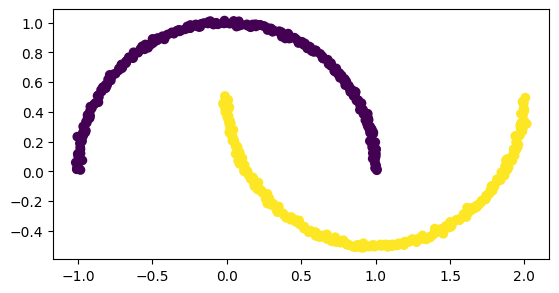

In [4]:
random_state = 17
n_samples = 500
X, y = make_moons(n_samples=n_samples, noise=0.01, random_state=random_state)
#X, y = make_circles(n_samples=n_samples, noise=0.01, factor=0.3, random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=random_state)

fig, ax = plt.subplots()
_ = ax.scatter(X[:,0], X[:,1], c=y)
ax.set_aspect('equal')

In [5]:
def make_grid(n,X):
    """
        Generates a grid of points within the bounds of the given data.

        n : int
            The number of points along each dimension of the grid.
        X : numpy.ndarray
            A 2D array of shape (num_samples, 2) representing the input data.

        numpy.ndarray
            A 2D array of shape (n*n, 2) containing the grid points.
    """
    x_min, y_min = np.min(X, axis=0)
    x_max, y_max = np.max(X, axis=0)
    xy = np.mgrid[x_min:x_max:1j*n, y_min:y_max:1j*n].reshape(2,-1).T
    return xy

In [6]:
# Hyperparameters (to be tuned)
kernel = 'linear' # test 'linear' or 'gaussian'
sigma = 1 
lbda = 0.1

# Define kernel
if kernel == 'linear':
    kernel = LinearKernel()
elif kernel == 'gaussian':
    kernel = GaussianKernel(sigma = sigma)
else:
    raise ValueError('Unknown kernel')


def KPCA_representation(X):
    """
    Compute the finite-dimensional representation of the principal components.

    Parameters
    ----------
    X : (n, d) numpy.ndarray
        The input data.

    Returns
    -------
    alpha : (n, k) numpy.ndarray
        The finite-dimensional representation of the principal components.
    """
    # Get the kernel matrix
    Kxx = kernel.get_Kxx(X)
    
    # Center the kernel matrix
    Kxx_c = center_train_gram_matrix(Kxx)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(Kxx_c)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Normalize eigenvectors to ensure orthonormality in the feature space
    alpha = eigenvectors / np.sqrt(eigenvalues + 1e-10)  # Add small value to avoid division by zero
    
    return alpha

In [7]:
def principal_component(alpha, X, Z):
    """
    return the evaluation of the principal components at points Z.

    Parameters
    ----------
    alpha : (n, k) numpy.ndarray
        The finite-dimensional representation of the principal components
    X: (n, d) numpy.ndarray
        The input data.
    Z : (m, d) array
        points to where to evaluate the principal components.

    Returns
    -------
    (k, m) array
        value of the k principal components at points y.
    """
    # Compute the Gram matrices
    Kxx = kernel.get_Kxx(X)
    Kxz = kernel.get_Kxz(X, Z)
    
    # Center the Gram matrices
    Kxz_c = center_test_gram_matrix(Kxx, Kxz)
    
    # Project the test points onto the principal components
    u = np.dot(alpha.T, Kxz_c)
    
    return u

In [8]:
n_eval = 200
Z = make_grid(n_eval, X)

alpha = KPCA_representation(X)
principal_component_fn = lambda E: principal_component(alpha, X, E)
feval = principal_component_fn(Z)
fself = principal_component_fn(X)

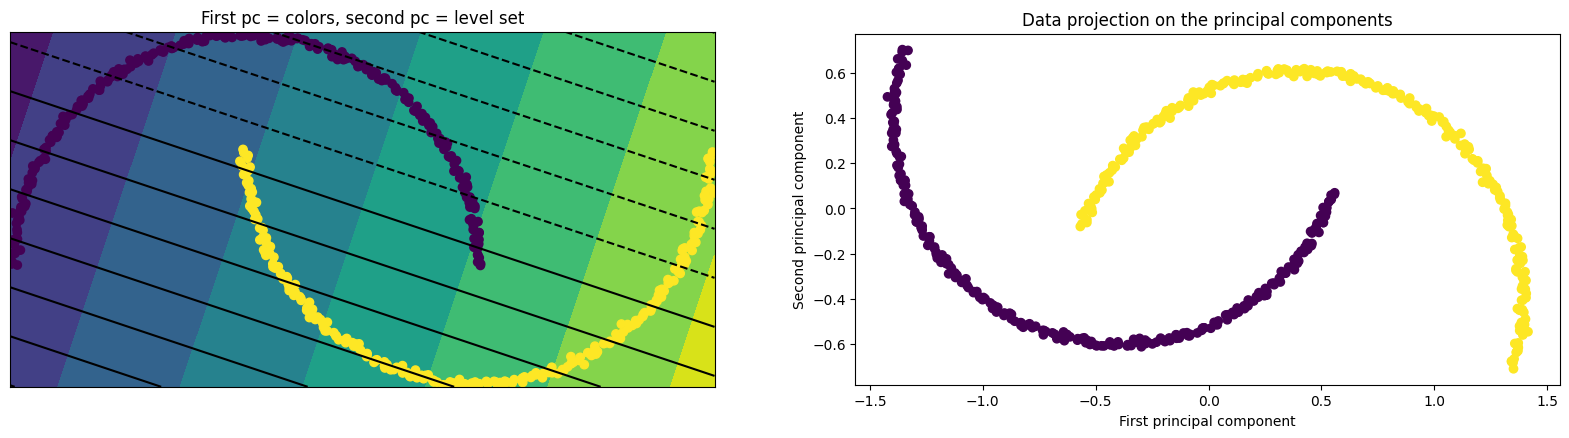

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
Ep = Z.T.reshape((2, n_eval, n_eval))
fxp = feval.reshape((feval.shape[0], n_eval, n_eval))
_ = ax1.contourf(Ep[0], Ep[1], fxp[0])
_ = ax1.contour(Ep[0], Ep[1], fxp[1], colors='black', levels=12 )
_ = ax1.scatter(X[:,0], X[:,1], c=y)
ax2.scatter(fself[0], fself[1], c=y)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
#ax2.xaxis.set_visible(False)
#ax2.yaxis.set_visible(False)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.set_title('First pc = colors, second pc = level set')
ax2.set_title('Data projection on the principal components')
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()


## Solving Regression under contamination

In real-world problems, it is not rare to observe outliers in collected data. For instance, this happens when a sensor has a default or faces some specific event such as an accident. In statistics, Huber (1964) proposed to describe this kind of situation with the framework of contamination. A data is polluted by a mixture of a (classic) Gaussian noise with a small variance and an arbitray distribution that represent contaminations. In this practical session, we propose to study regression under contamination, meaning that the output training data are contaminated as follows:

\begin{equation*}
y_i = f^*(x_i) + \delta_i \epsilon_i + ( 1 - \delta_i) u_i,
\end{equation*}
where $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$ is a Gaussian noise, $\delta_i \sim \mathcal{B}(p)$ is a Bernoulli variable, with $0 < p < 1$
and $u_i \sim Un([-b,+b])$, with $b > 0$, is a uniform variable.


We consider the general regression problem with a RKHS $\mathcal{H}_k$.
The **representer theorem** garantees that the solution of any problem of the form 

\begin{equation*}
\min_{f\in \mathcal{H}_k} \frac{1}{n}\sum_{i=1}^n \ell(f(x_i),y_i) + \lambda ||f||^2_{\mathcal{H}_k}
\end{equation*}

Can be written as

\begin{equation*}
\hat{f} = \sum_{i=1}^n \alpha_i \phi(x_i)
\end{equation*}

i.e.

\begin{equation*}
\hat{f}(x) = \sum_{i=1}^n \alpha_i k(x,x_i)
\end{equation*}

Meaning that finding the best function in $\mathcal{H}_k$ (which is infinite) is equivalent to find the right $\alpha \in \mathbb{R}^n$ !



Q6) Define a simple toy problem with $x$ and $y$ $\in \mathbb{R}$. For that, define a simple toy function $f^*$. Write the code to generate i.i.d. contaminated datasets $\{(x_i,y_i)\}_{i=1}^n$ for different values of $p$, $\sigma$ and $b$ for both training and test.

In [10]:
# Define the toy function f_star
def f_star(x):
    """
    A simple toy function f_star.
    """
    return x**2

def generate_contaminated_dataset(n, p, sigma, b):
    """
    Generate i.i.d. contaminated datasets.

    Parameters
    ----------
    n : int
        Number of samples.
    p : float
        Probability of Gaussian noise (contamination probability).
    sigma : float
        Standard deviation of Gaussian noise.
    b : float
        Range of uniform noise [-b, b].

    Returns
    -------
    x : numpy.ndarray
        Input data of shape (n, 1).
    y : numpy.ndarray
        Output data of shape (n,).
    """
    # Genererate random input data
    x = np.random.rand(n).reshape(-1, 1)  # Reshape pour obtenir (n, 1)
    
    delta = np.random.binomial(1, p, size=n)  # Bernoulli variable
    gaussian_noise = np.random.normal(0, sigma, size=n)  # Gaussian noise
    uniform_noise = np.random.uniform(-b, b, size=n)  # Uniform noise
    
    # Calculate the contaminated output
    y = f_star(x.flatten()) + delta * gaussian_noise + (1 - delta) * uniform_noise
    
    return x, y

# Example usage
n_train = 100  # Number of training samples
n_test = 50    # Number of test samples
p = 0.8        # Probability of Gaussian noise
sigma = 0.1    # Standard deviation of Gaussian noise
b = 1.0        # Range of uniform noise

# Generate training and test datasets
x_train, y_train = generate_contaminated_dataset(n_train, p, sigma, b)
x_test, y_test = generate_contaminated_dataset(n_test, p, sigma, b)

Q7) Loss functions are not equal with respect to output contaminations. Consider the square loss $\ell_{square}(y,f(x)):= (y - f(x))^2$ and solve the so-called Kernel Ridge Regression problem. You can use the closed form solution (implement it) or the stochastic Gradient descent implementation of scikitlearn. 

In [11]:
def kernel_ridge_regression(X_train, y_train, X_test, kernel='rbf', lbda=1.0, sigma=1.0):
    """
    Solve the Kernel Ridge Regression problem using closed form solution.
    
    Parameters
    ----------
    X_train : (n, d) numpy.ndarray
        Training input data.
    y_train : (n,) numpy.ndarray
        Training target values.
    X_test : (m, d) numpy.ndarray
        Test input data.
    kernel : str, default='rbf'
        Type of kernel to use ('rbf' or 'linear')
    lbda : float, default=1.0
        Regularization parameter.
    sigma : float, default=1.0
        Parameter for the RBF kernel.
    
    Returns
    -------
    y_pred : (m,) numpy.ndarray
        Predicted values for X_test.
    """
    # Create the kernel object based on the specified kernel type
    if kernel == 'rbf':
        kernel_obj = GaussianKernel(sigma=sigma)
    elif kernel == 'linear':
        kernel_obj = LinearKernel()
    else:
        raise ValueError(f"Kernel type '{kernel}' not implemented")
    
    # Calculate the Gram matrix for the training data
    Kxx = kernel_obj.get_Kxx(X_train)
    
    # Center the Gram matrix for training data
    Kxx_c = center_train_gram_matrix(Kxx)
    
    # Calculate the coefficients alpha (closed form solution)
    n = X_train.shape[0]
    alpha = np.linalg.solve(Kxx_c + lbda * np.eye(n), y_train)
    
    # Calculate the Gram matrix between training and test data
    Kxz = kernel_obj.get_Kxz(X_train, X_test)
    
    # Center the Gram matrix for test data
    Kxz_c = center_test_gram_matrix(Kxx, Kxz)
    
    # Predict the values for the test data using the Kernel class method
    y_pred = kernel_obj.compute_prediction_test(Kxz_c, alpha)
    
    return y_pred


Q8) Evaluate the performance of KRR on a test set for different contaminated training sets.

In [12]:
from sklearn.metrics import mean_squared_error

# Contamination parameters
contamination_params = [
    {"p": 0.8, "sigma": 0.1, "b": 1.0},
    {"p": 0.6, "sigma": 0.2, "b": 1.5},
    {"p": 0.4, "sigma": 0.3, "b": 2.0},
    {"p": 0.2, "sigma": 0.5, "b": 2.5},
]

# Stocking the results
results = []

# Loop over different contamination levels
for params in contamination_params:
    # Generate a contaminated training set
    x_train_contaminated, y_train_contaminated = generate_contaminated_dataset(
        n_train, params["p"], params["sigma"], params["b"]
    )
    
    # Perform kernel ridge regression
    y_pred = kernel_ridge_regression(
        x_train_contaminated, y_train_contaminated, x_test, kernel='rbf', lbda=lbda, sigma=sigma
    )
    
    # Calculate the mean squared error (MSE) on the test set
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results
    results.append({
        "p": params["p"],
        "sigma": params["sigma"],
        "b": params["b"],
        "mse": mse
    })

# Display the results
for result in results:
    print(f"Contamination (p={result['p']}, sigma={result['sigma']}, b={result['b']}): MSE = {result['mse']:.4f}")

Contamination (p=0.8, sigma=0.1, b=1.0): MSE = 3543.9042
Contamination (p=0.6, sigma=0.2, b=1.5): MSE = 4394.5018
Contamination (p=0.4, sigma=0.3, b=2.0): MSE = 2978.4129
Contamination (p=0.2, sigma=0.5, b=2.5): MSE = 5081.2689


Q10) Let us consider the so-called $\epsilon$-insensitive loss:
   $$\ell_{\epsilon}(y,f(x)):= \max(0, |y - f(x)| -\epsilon)$$
Solve the Support Vector regression problem using this loss and squared norm penalty. There exist two ways to solve this problem: either i) you notice that the problem wriets as a convex programme with affine inequality constraint and dualize the problem (at some point we ned to use functional derivative of $f$ when deploying KKT), or ii) apply representer theorem and write the primal problem with $\alpha \in \mathbb{R}^n$. Introduce slack variables for the two types of errors (positive and negative): $\xi^+ \in \mathbb{R}^n$ and $\xi^- \in \mathbb{R}^n$. Then apply Lagrangian relaxation (KKT conditions) and write the problem  in the dual space. Choose one of the other way (split the classroom in two). Any way this leads to Support Vector Regression.
    

# Support Vector Regression with ε-insensitive Loss

To solve the support vector regression (SVR) problem with ε-insensitive loss, I will use the representative theorem approach (option ii), then introduce slack variables and apply Lagrangian relaxation.

## 1. Primal Problem

The primal optimization problem is:

$$
\min_{f \in \mathcal{H}} \frac{1}{2} \|f\|_{\mathcal{H}}^2 + C \sum_{i=1}^n \max(0, |y_i - f(x_i)| - \epsilon)
$$

By the Representer Theorem, the solution takes the form:

$$
f(x) = \sum_{j=1}^n \alpha_j K(x_j, x)
$$

We introduce slack variables \( \xi_i^+, \xi_i^- \) for the ε-insensitive loss:

$$
\min_{\alpha, \xi^+, \xi^-} \frac{1}{2} \alpha^T K \alpha + C \sum_{i=1}^n (\xi_i^+ + \xi_i^-)
$$

subject to:

$$
\sum_{j=1}^n \alpha_j K(x_j, x_i) - y_i \leq \epsilon + \xi_i^+, \quad \xi_i^+ \geq 0
$$
$$
y_i - \sum_{j=1}^n \alpha_j K(x_j, x_i) \leq \epsilon + \xi_i^-, \quad \xi_i^- \geq 0
$$

## 2. Lagrangian Formulation

Introduce Lagrange multipliers:
- $\beta_i^+, \beta_i^- \geq 0 $: inequality constraints
- $ \mu_i^+, \mu_i^- \geq 0 $: non-negativity of slacks

The Lagrangian is:

$$
\begin{aligned}
L = & \frac{1}{2} \alpha^T K \alpha + C \sum_i (\xi_i^+ + \xi_i^-) - \sum_i \mu_i^+ \xi_i^+ - \sum_i \mu_i^- \xi_i^- \\
& + \sum_i \beta_i^+ \left( \sum_j \alpha_j K(x_j, x_i) - y_i - \epsilon - \xi_i^+ \right) \\
& + \sum_i \beta_i^- \left( y_i - \sum_j \alpha_j K(x_j, x_i) - \epsilon - \xi_i^- \right)
\end{aligned}
$$

## 3. KKT Conditions

Stationarity conditions:

**w.r.t. $ \alpha_j $:**
$$
\frac{\partial L}{\partial \alpha_j} = \sum_i \alpha_i K(x_i, x_j) + \sum_i \beta_i^+ K(x_j, x_i) - \sum_i \beta_i^- K(x_j, x_i) = 0
$$
So:
$$
\alpha = \beta^- - \beta^+
$$

**w.r.t. $ \xi_i^+, \xi_i^- $:**
$$
\frac{\partial L}{\partial \xi_i^+} = C - \mu_i^+ - \beta_i^+ = 0 \Rightarrow \beta_i^+ = C - \mu_i^+ \leq C
$$
$$
\frac{\partial L}{\partial \xi_i^-} = C - \mu_i^- - \beta_i^- = 0 \Rightarrow \beta_i^- = C - \mu_i^- \leq C
$$

## 4. Complementarity Condition

From the KKT conditions:
- If $\xi_i^+ > 0 \Rightarrow \beta_i^+ = C $
- If $\xi_i^- > 0 \Rightarrow \beta_i^- = C $
- But not both at the same time.

Hence, for each \( i \):

$$
\beta_i^+ \cdot \beta_i^- = 0
$$

## 5. Dual Problem

Substituting into the Lagrangian, we derive the dual:

$$
\max_{\beta^+, \beta^-} -\frac{1}{2} (\beta^- - \beta^+)^T K (\beta^- - \beta^+) - \epsilon \sum_i (\beta_i^+ + \beta_i^-) + \sum_i y_i (\beta_i^- - \beta_i^+)
$$

subject to:

$$
0 \leq \beta_i^+, \beta_i^- \leq C, \quad \beta_i^+ \cdot \beta_i^- = 0 \quad \forall i
$$

## 6. Prediction Function

After solving the dual, the predictor is:

$$
f(x) = \sum_{i=1}^n (\beta_i^- - \beta_i^+) K(x_i, x)
$$

Support vectors correspond to indices where $\beta_i^+ > 0$ or $\beta_i^- > 0$.



Q11) First study the behaviour of SVR depending on the choice of the hyperparameters $\epsilon$ and $\lambda$ on the toy problem without contaminations ($\delta_i=1$ is a dterminstic and constant.) 

Visualizing effect of epsilon...


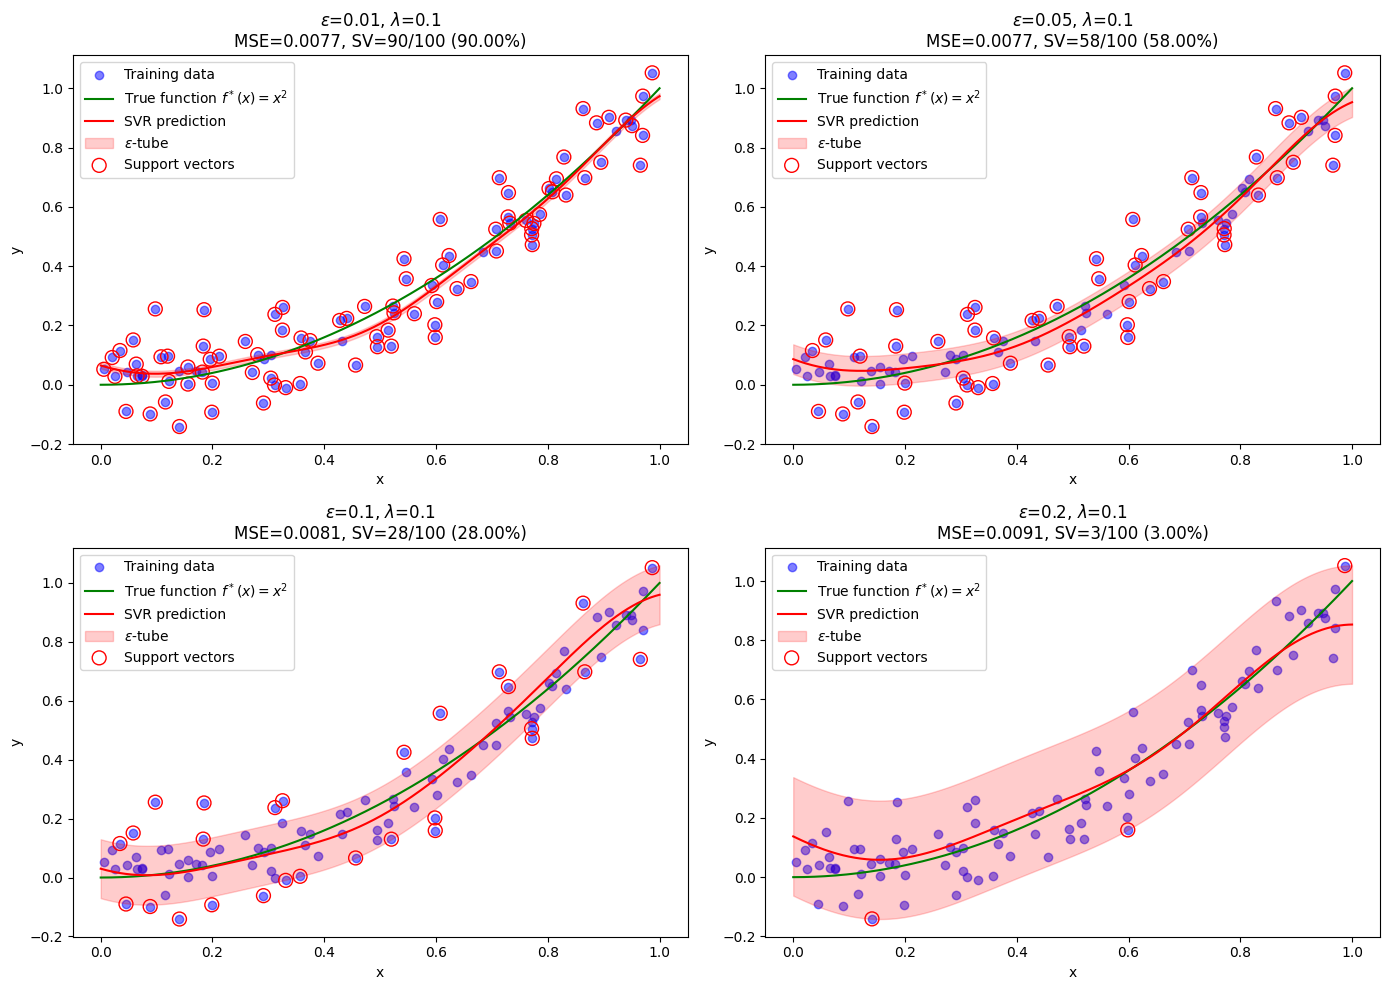

Visualizing effect of lambda...


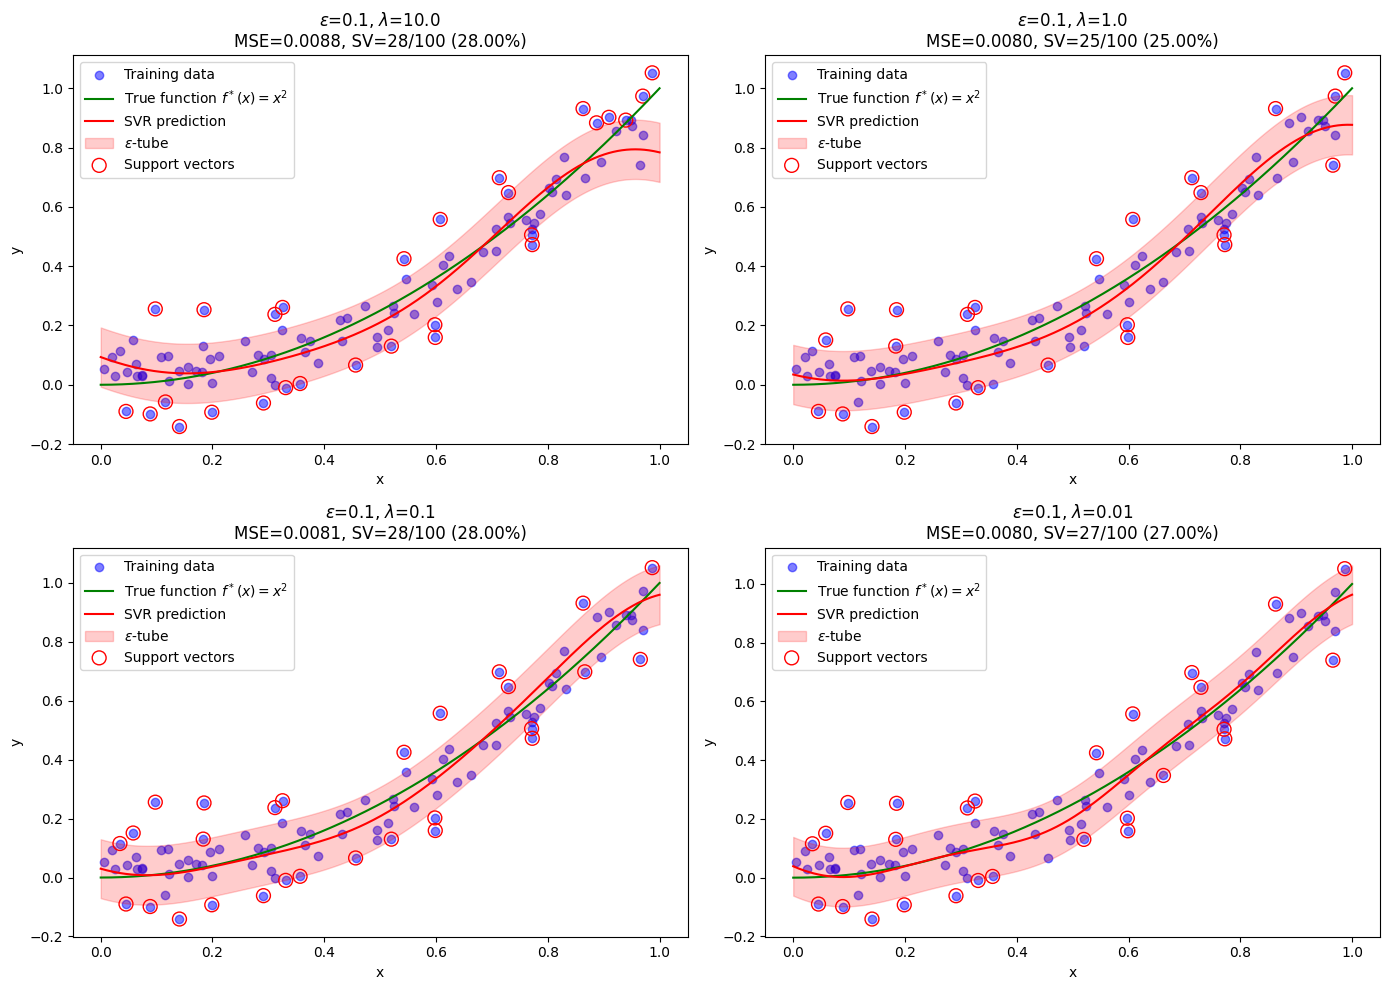

Visualizing grid of epsilon and lambda combinations...


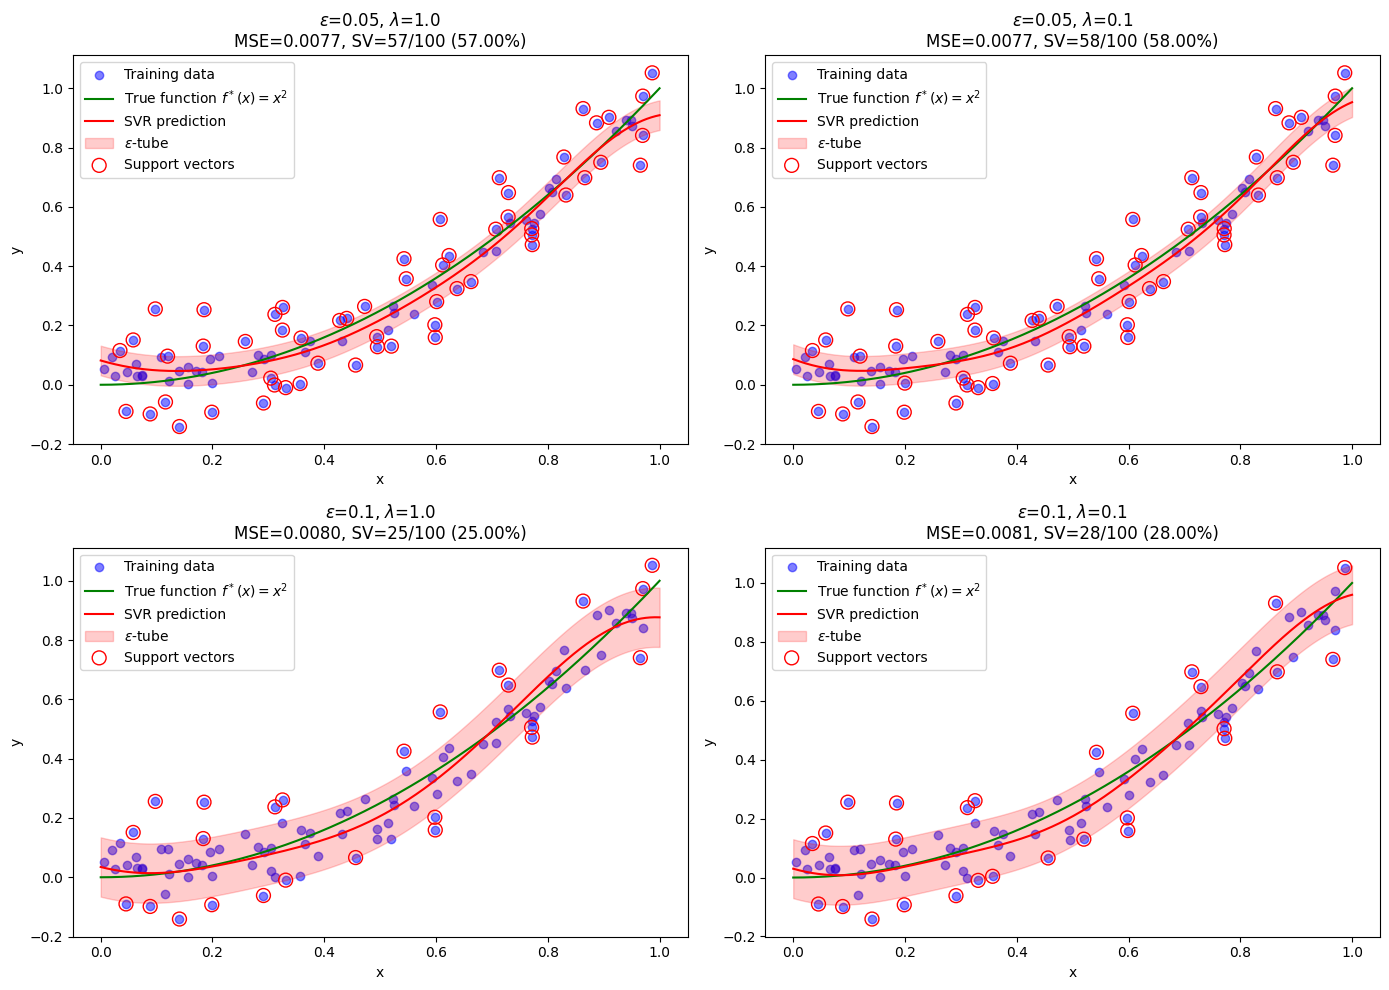

Creating MSE heatmap...


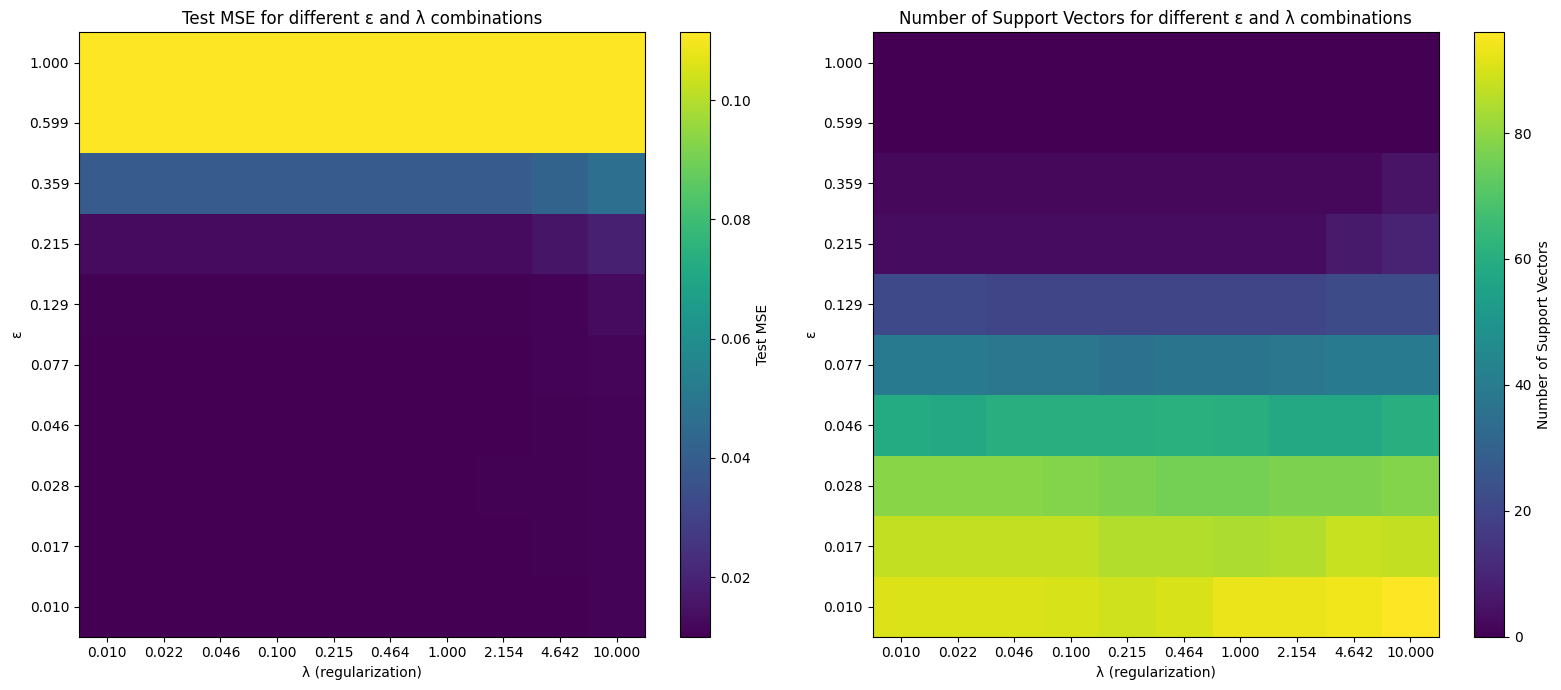

All visualizations completed!


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Generate non-contaminated dataset
def generate_dataset(n, sigma):
    """
    Generate i.i.d. non-contaminated datasets (only Gaussian noise).

    Parameters
    ----------
    n : int
        Number of samples.
    sigma : float
        Standard deviation of Gaussian noise.

    Returns
    -------
    x : numpy.ndarray
        Input data of shape (n, 1).
    y : numpy.ndarray
        Output data of shape (n,).
    """
    x = np.random.rand(n).reshape(-1, 1)  # Generate x in [0, 1]
    noise = np.random.normal(0, sigma, size=n)  # Gaussian noise
    y = f_star(x.flatten()) + noise  # No contamination (deterministic delta=1)
    return x, y

# True function f*(x) = x^2
def f_star(x):
    return x**2

# Set up parameters
n_train = 100  # Number of training samples
n_test = 200   # Number of test samples
sigma = 0.1    # Standard deviation of Gaussian noise

# Generate training and test datasets
np.random.seed(42)  # For reproducibility
x_train, y_train = generate_dataset(n_train, sigma)
x_test, y_test = generate_dataset(n_test, sigma)

# Create a fine grid for visualization
x_grid = np.linspace(0, 1, 1000).reshape(-1, 1)
y_grid_true = f_star(x_grid.flatten())

# Function to train SVR model and plot results
def plot_svr_model(epsilon, lambda_val, title, ax):
    """
    Train SVR model with given hyperparameters and plot results.
    
    Parameters
    ----------
    epsilon : float
        Width of the epsilon-tube.
    lambda_val : float
        Regularization strength.
    title : str
        Title for the subplot.
    ax : matplotlib.axes.Axes
        The axes to plot on.
    """
    # Convert lambda to C (C = 1/lambda)
    C = 1.0 / lambda_val
    
    # Train SVR model with RBF kernel
    svr = SVR(kernel='rbf', epsilon=epsilon, C=C, gamma='scale')
    svr.fit(x_train, y_train)
    
    # Make predictions
    y_pred_train = svr.predict(x_train)
    y_pred_grid = svr.predict(x_grid)
    
    # Calculate MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    # Count support vectors
    n_sv = len(svr.support_)
    sv_ratio = n_sv / n_train
    
    # Plot
    ax.scatter(x_train, y_train, color='blue', alpha=0.5, label='Training data')
    ax.plot(x_grid, y_grid_true, color='green', label='True function $f^*(x)=x^2$')
    ax.plot(x_grid, y_pred_grid, color='red', label='SVR prediction')
    
    # Plot epsilon tube
    ax.fill_between(
        x_grid.flatten(),
        y_pred_grid - epsilon,
        y_pred_grid + epsilon,
        color='red',
        alpha=0.2,
        label='$\epsilon$-tube'
    )
    
    # Highlight support vectors
    if len(svr.support_) > 0:
        ax.scatter(
            x_train[svr.support_], 
            y_train[svr.support_], 
            s=100, 
            linewidth=1, 
            facecolors='none', 
            edgecolors='red',
            label='Support vectors'
        )
    
    # Set labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"{title}\nMSE={mse_train:.4f}, SV={n_sv}/{n_train} ({sv_ratio:.2%})")
    ax.legend(loc='upper left')

# 1. Effect of epsilon (with fixed lambda)
def plot_epsilon_effect():
    """
    Visualize the effect of different epsilon values with a fixed lambda value.
    """
    lambda_fixed = 0.1  # Fixed regularization parameter (equivalent to C=10.0)
    epsilons = [0.01, 0.05, 0.1, 0.2]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for i, eps in enumerate(epsilons):
        plot_svr_model(eps, lambda_fixed, f"$\epsilon$={eps}, $\lambda$={lambda_fixed}", axes[i])
    
    plt.tight_layout()
    plt.savefig('svr_epsilon_effect.png', dpi=300)
    plt.show()

# 2. Effect of lambda (with fixed epsilon)
def plot_lambda_effect():
    """
    Visualize the effect of different lambda values with a fixed epsilon value.
    """
    epsilon_fixed = 0.1  # Fixed epsilon parameter
    lambda_values = [10.0, 1.0, 0.1, 0.01]  # Equivalent to C=[0.1, 1.0, 10.0, 100.0]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for i, lambda_val in enumerate(lambda_values):
        plot_svr_model(epsilon_fixed, lambda_val, f"$\epsilon$={epsilon_fixed}, $\lambda$={lambda_val}", axes[i])
    
    plt.tight_layout()
    plt.savefig('svr_lambda_effect.png', dpi=300)
    plt.show()

# 3. Grid of epsilon and lambda combinations
def plot_parameter_grid():
    """
    Visualize a grid of epsilon and lambda combinations.
    """
    epsilons = [0.05, 0.1]
    lambda_values = [1.0, 0.1]  # Equivalent to C=[1.0, 10.0]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for i, eps in enumerate(epsilons):
        for j, lambda_val in enumerate(lambda_values):
            idx = i * len(lambda_values) + j
            plot_svr_model(eps, lambda_val, f"$\epsilon$={eps}, $\lambda$={lambda_val}", axes[idx])
    
    plt.tight_layout()
    plt.savefig('svr_parameter_grid.png', dpi=300)
    plt.show()

# 4. MSE heatmap for different combinations of epsilon and lambda
def plot_mse_heatmap():
    """
    Create a heatmap of MSE values for different combinations of epsilon and lambda.
    """
    epsilons = np.logspace(-2, 0, 10)  # From 0.01 to 1.0
    lambda_values = np.logspace(-2, 1, 10)  # From 0.01 to 10.0 (equivalent to C from 0.1 to 100.0)
    
    mse_values = np.zeros((len(epsilons), len(lambda_values)))
    sv_counts = np.zeros((len(epsilons), len(lambda_values)))
    
    for i, eps in enumerate(epsilons):
        for j, lambda_val in enumerate(lambda_values):
            # Convert lambda to C
            C = 1.0 / lambda_val
            
            # Train SVR model
            svr = SVR(kernel='rbf', epsilon=eps, C=C, gamma='scale')
            svr.fit(x_train, y_train)
            
            # Make predictions on test set
            y_pred = svr.predict(x_test)
            
            # Calculate MSE on test set
            mse = mean_squared_error(y_test, y_pred)
            mse_values[i, j] = mse
            
            # Count support vectors
            sv_counts[i, j] = len(svr.support_)
    
    # Plot MSE heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # MSE heatmap
    im1 = ax1.imshow(mse_values, cmap='viridis', origin='lower', aspect='auto')
    cbar1 = plt.colorbar(im1, ax=ax1)
    cbar1.set_label('Test MSE')
    
    # Support vector count heatmap
    im2 = ax2.imshow(sv_counts, cmap='viridis', origin='lower', aspect='auto')
    cbar2 = plt.colorbar(im2, ax=ax2)
    cbar2.set_label('Number of Support Vectors')
    
    # Set labels and titles
    for ax in [ax1, ax2]:
        ax.set_xticks(np.arange(len(lambda_values)))
        ax.set_yticks(np.arange(len(epsilons)))
        ax.set_xticklabels([f'{lambda_val:.3f}' for lambda_val in lambda_values])
        ax.set_yticklabels([f'{eps:.3f}' for eps in epsilons])
        ax.set_xlabel('λ (regularization)')
        ax.set_ylabel('ε')
    
    ax1.set_title('Test MSE for different ε and λ combinations')
    ax2.set_title('Number of Support Vectors for different ε and λ combinations')
    
    plt.tight_layout()
    plt.savefig('svr_mse_heatmap.png', dpi=300)
    plt.show()

# Run all visualization functions
if __name__ == "__main__":
    print("Visualizing effect of epsilon...")
    plot_epsilon_effect()
    
    print("Visualizing effect of lambda...")
    plot_lambda_effect()
    
    print("Visualizing grid of epsilon and lambda combinations...")
    plot_parameter_grid()
    
    print("Creating MSE heatmap...")
    plot_mse_heatmap()
    
    print("All visualizations completed!")

## Influence of the ε parameter (tube width)
The ε parameter defines an "insensitive" zone around the prediction. Errors smaller than ε do not contribute to the loss function. 

### Effects of a small ε:

- More support vectors: With a narrow tube, more points exceed the margins
- Better potential accuracy: The model follows the training data more closely
- Increased risk of overfitting: The model can capture noise in the data
- Higher computational complexity: More support vectors = more computation

### Effects of a large ε:

- Fewer support vectors: With a wide tube, fewer points exceed the margins
- Smoother model: Insensitive to small variations in the data
- Risk of underfitting: May miss important features of the data
- More compact model: Fewer support vectors = faster predictions

For our function f*(x) = x², too large an ε risks poorly capturing the curvature of the parabola. 

## Influence of the λ parameter (regularization)
The λ parameter (or its inverse C=1/λ in some formulations) controls the tradeoff between data fit and model complexity.

### Effects of a large λ (small C):

- Strong regularization: Favors simpler ("flatter") functions
- Less sensitive to outliers: The impact of individual errors is limited
- Potential underfitting: May produce a function that is too simplified to capture the underlying relationship

### Effects of a small λ (large C):

- Weak regularization: Favors fitting the training data
- More sensitive to outliers: Individual errors have a greater impact
- Potential overfitting: May produce a function that closely follows the training data

For our parabolic function f*(x) = x², too large a λ could "flatten" the curve and underestimate the curvature. 

## Interaction between ε and λ
These two hyperparameters interact in a complex way:

- ε small + λ small: Very flexible model that closely follows the data (risk of overfitting)
- ε large + λ large: Very rigid and simplified model (risk of underfitting)
- ε small + λ large: Good compromise for low-noise data
- ε large + λ small: Can be useful for very noisy data

Q12) Now, use the result of Q6) to evaluate performance of SVR as compared to KKR on contaminated distributions. 
What can you say about the behaviour of SVR.

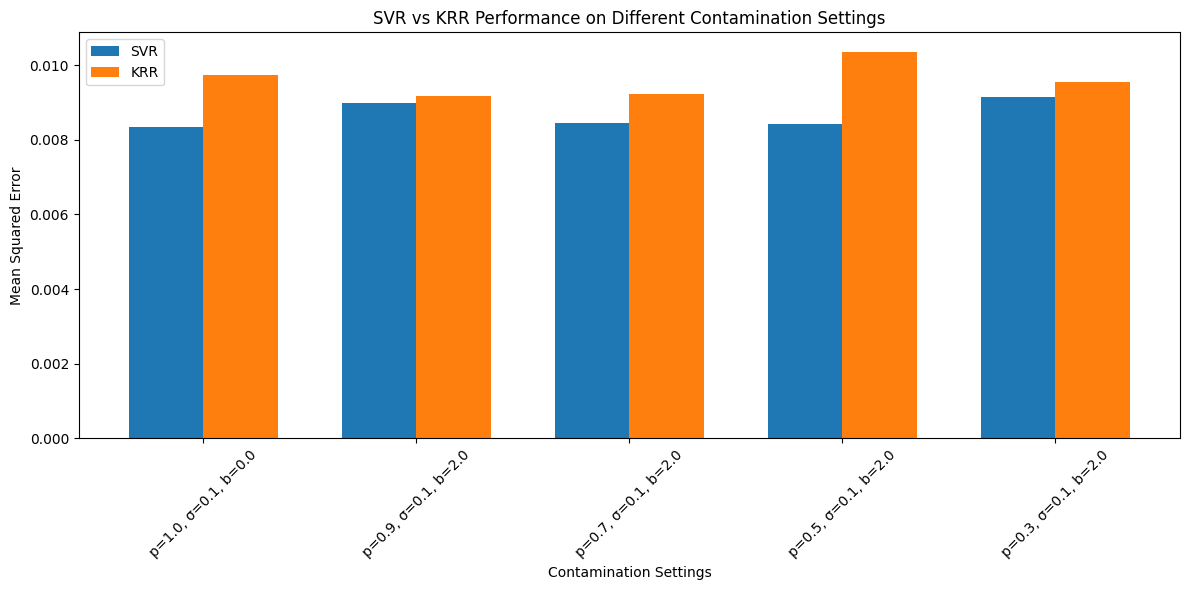

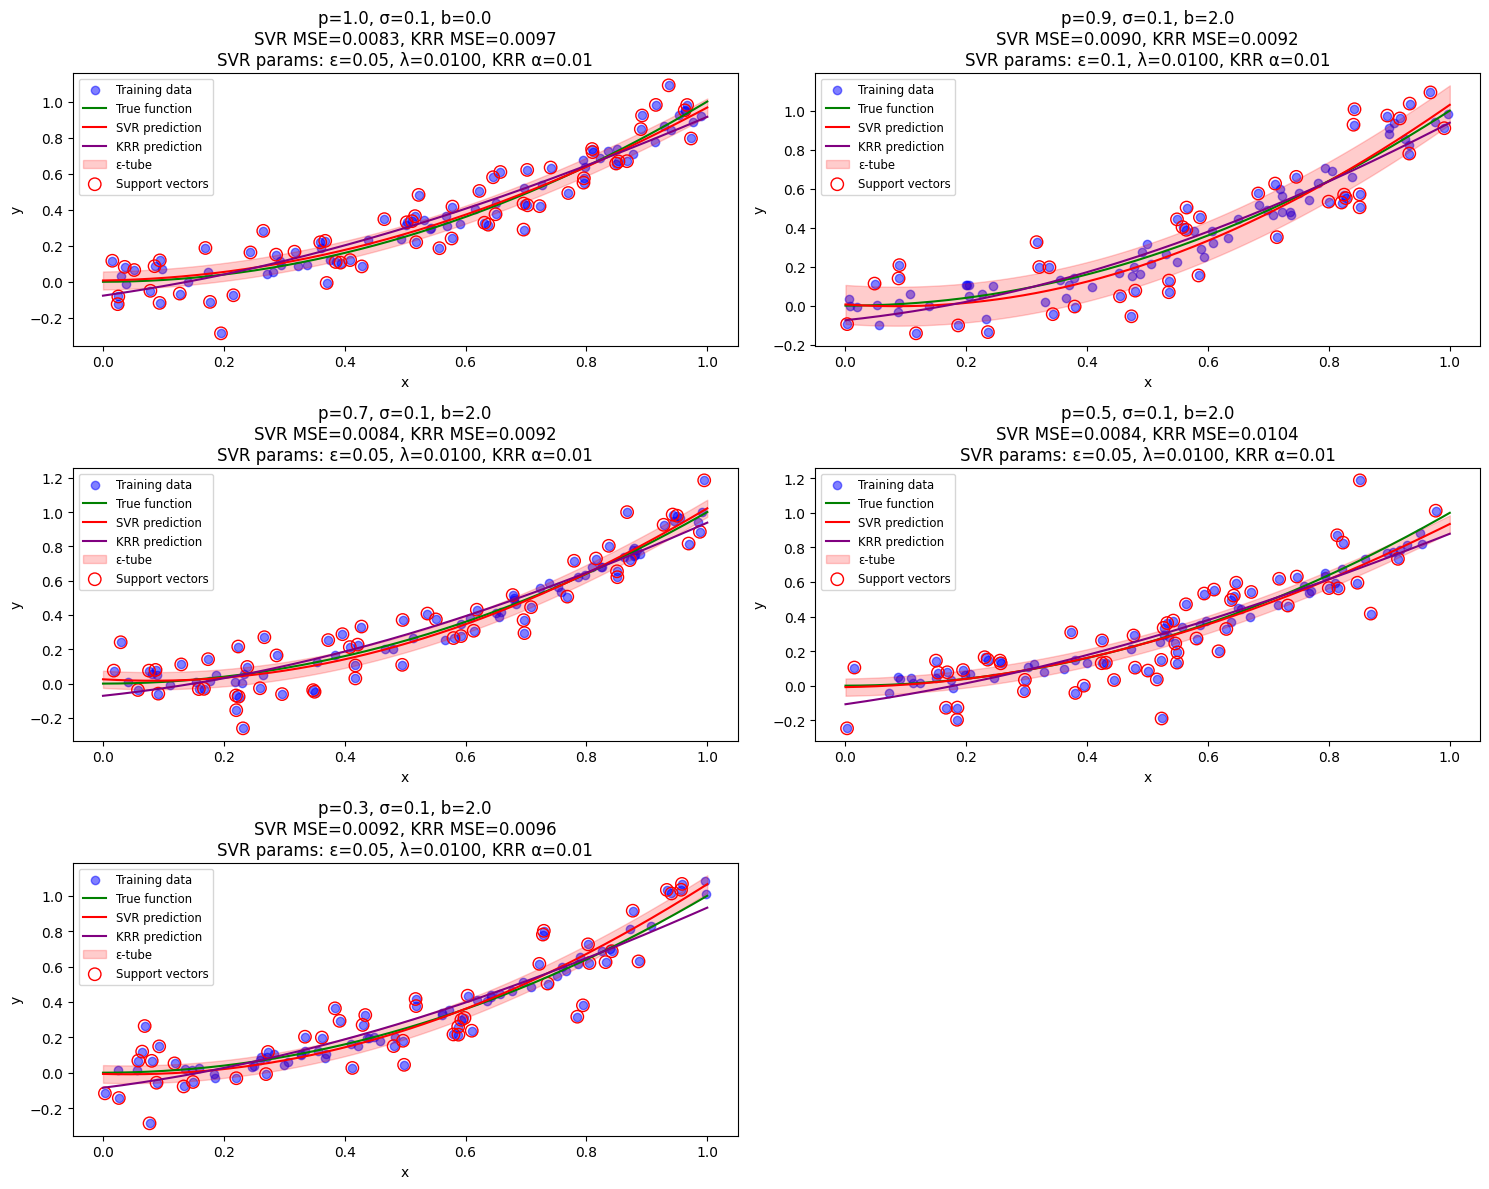

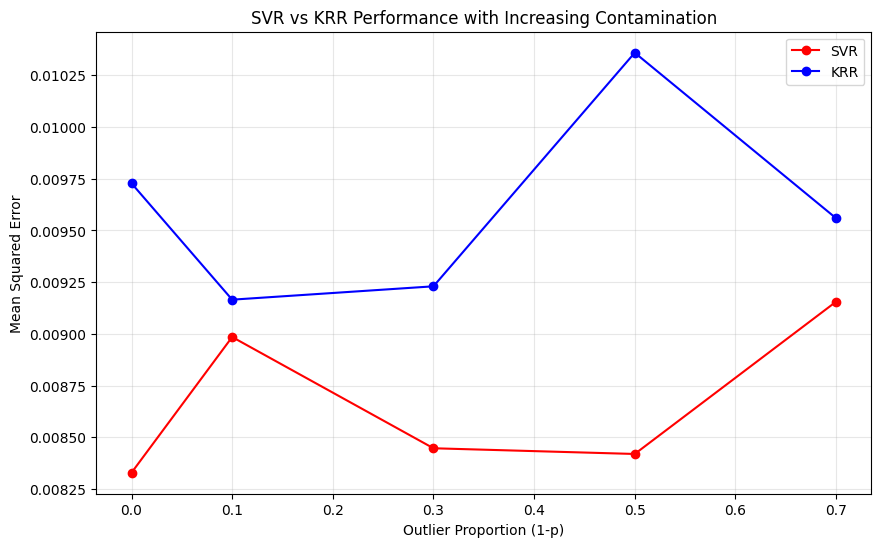

Comparison Results:
----------------------------------------------------------------------------------------------------
  p   | sigma |   b   |  SVR MSE   |  KRR MSE   |  SVR/KRR   |  Best ε  |  Best λ  |  Best α  | SV count
----------------------------------------------------------------------------------------------------
1.00  | 0.10  | 0.00  |   0.0083   |   0.0097   |   0.8561   |  0.0500  |  0.0100  |  0.0100  |    61   
0.90  | 0.10  | 2.00  |   0.0090   |   0.0092   |   0.9803   |  0.1000  |  0.0100  |  0.0100  |    41   
0.70  | 0.10  | 2.00  |   0.0084   |   0.0092   |   0.9152   |  0.0500  |  0.0100  |  0.0100  |    55   
0.50  | 0.10  | 2.00  |   0.0084   |   0.0104   |   0.8127   |  0.0500  |  0.0100  |  0.0100  |    56   
0.30  | 0.10  | 2.00  |   0.0092   |   0.0096   |   0.9578   |  0.0500  |  0.0100  |  0.0100  |    50   
----------------------------------------------------------------------------------------------------

Analyzing effect of increasing noise level (si

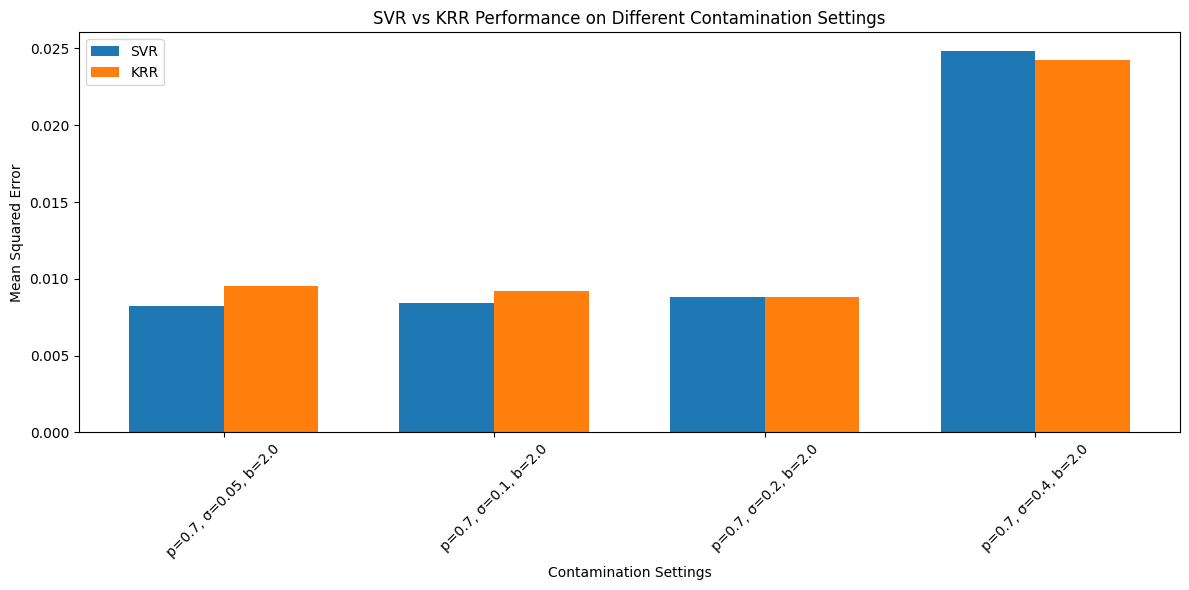

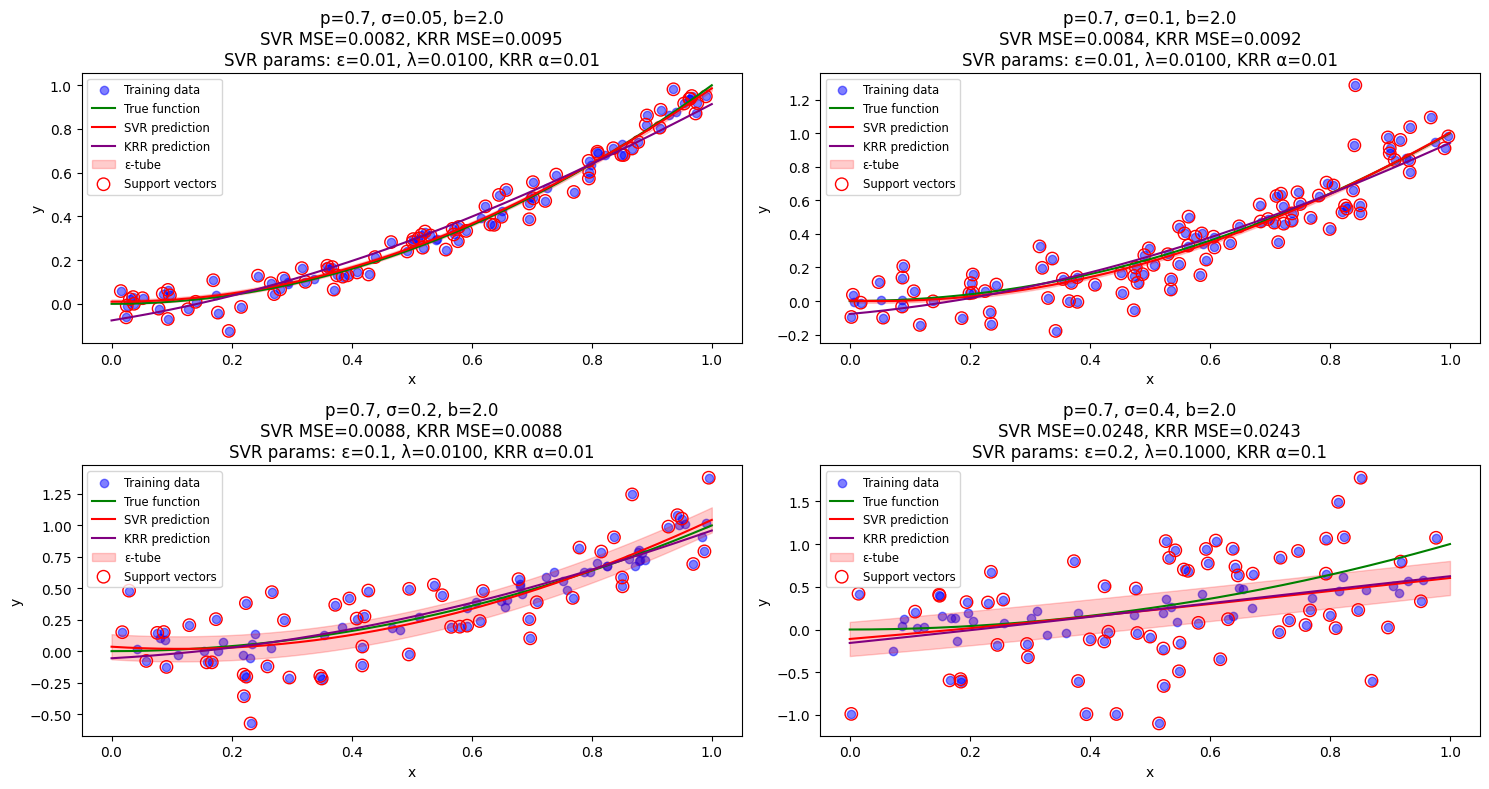

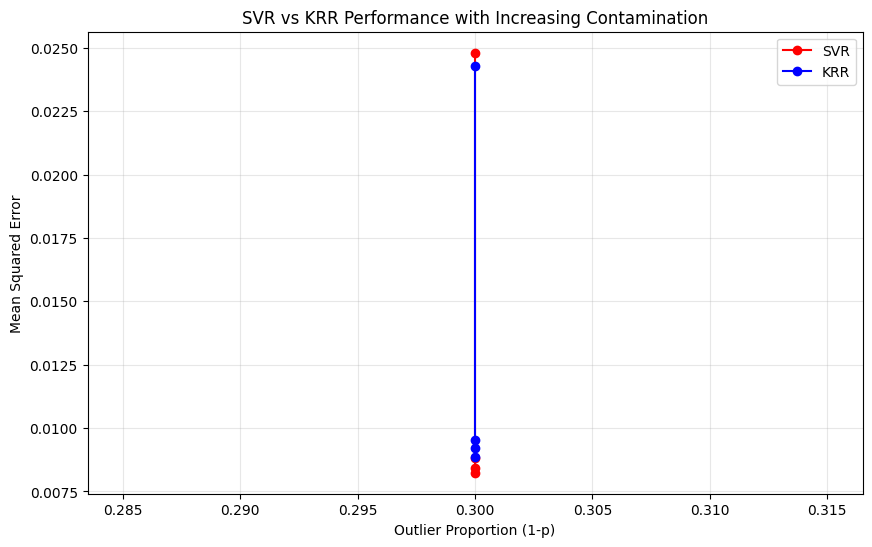

Comparison Results:
----------------------------------------------------------------------------------------------------
  p   | sigma |   b   |  SVR MSE   |  KRR MSE   |  SVR/KRR   |  Best ε  |  Best λ  |  Best α  | SV count
----------------------------------------------------------------------------------------------------
0.70  | 0.05  | 2.00  |   0.0082   |   0.0095   |   0.8634   |  0.0100  |  0.0100  |  0.0100  |    85   
0.70  | 0.10  | 2.00  |   0.0084   |   0.0092   |   0.9136   |  0.0100  |  0.0100  |  0.0100  |    94   
0.70  | 0.20  | 2.00  |   0.0088   |   0.0088   |   0.9974   |  0.1000  |  0.0100  |  0.0100  |    54   
0.70  | 0.40  | 2.00  |   0.0248   |   0.0243   |   1.0221   |  0.2000  |  0.1000  |  0.1000  |    65   
----------------------------------------------------------------------------------------------------

Analyzing effect of increasing outlier range (b)...


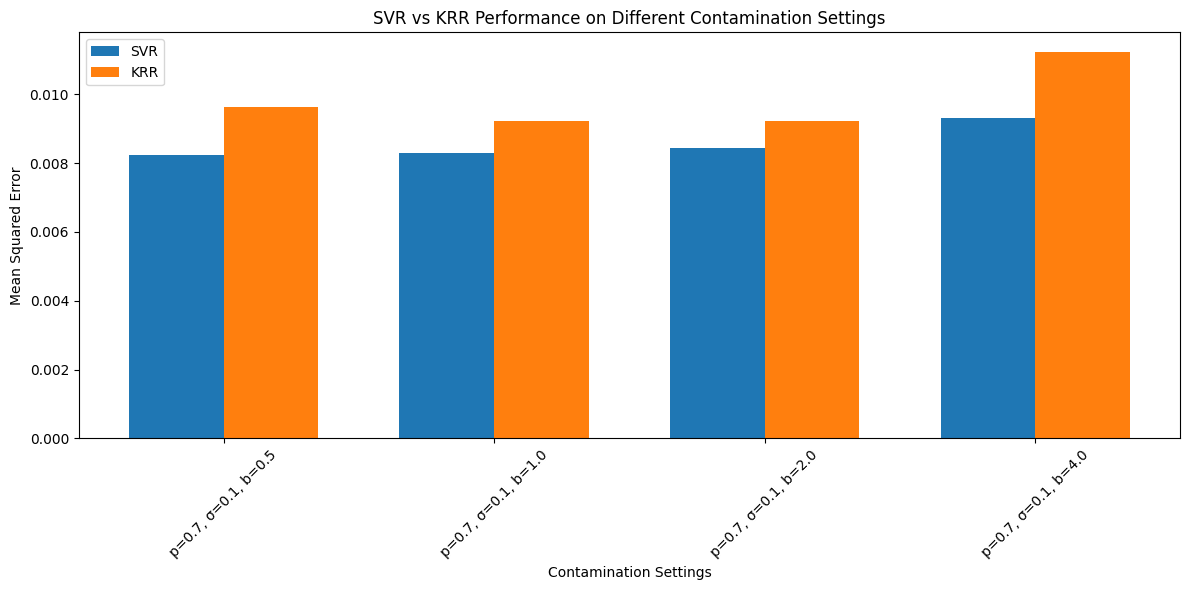

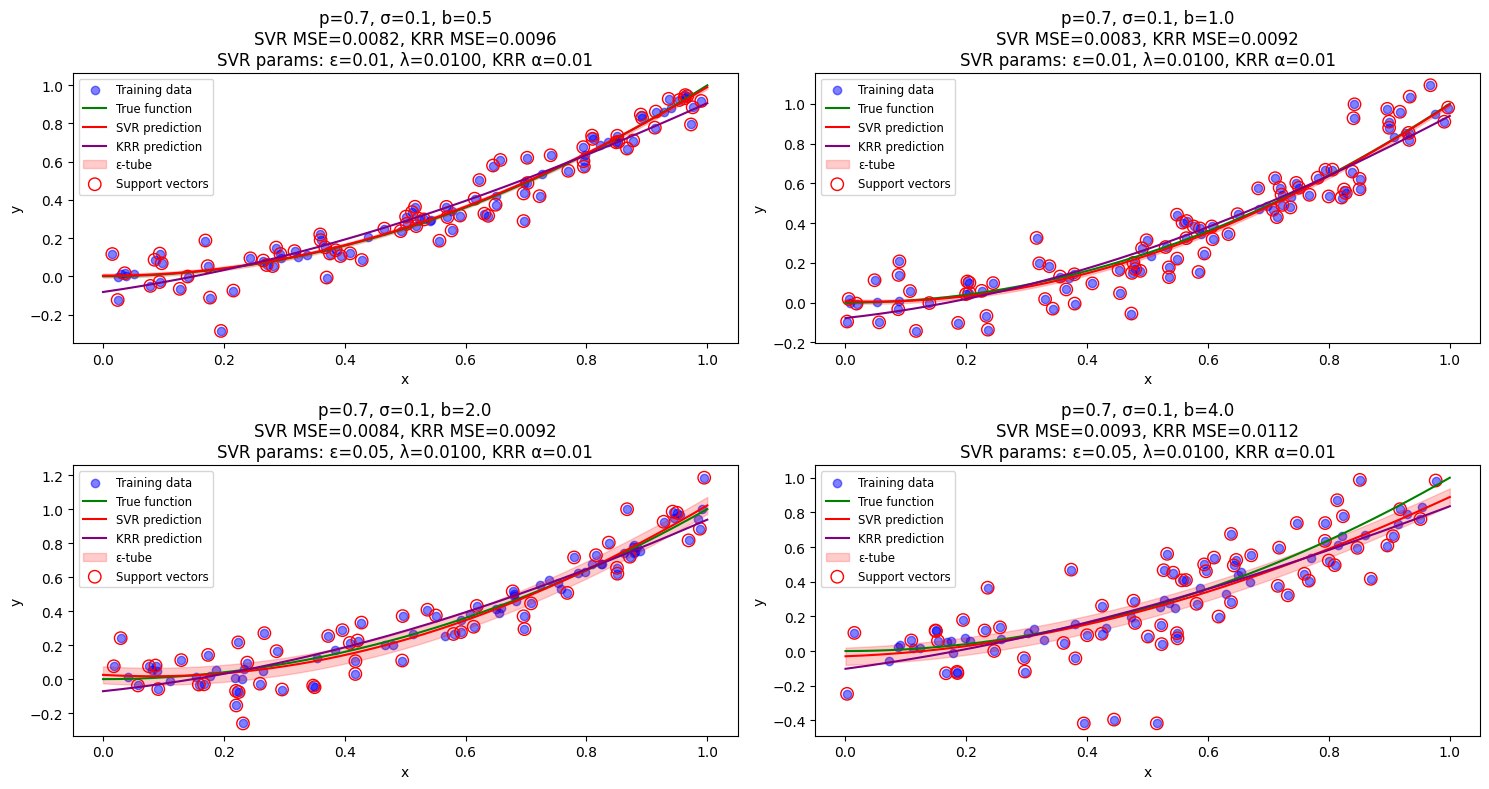

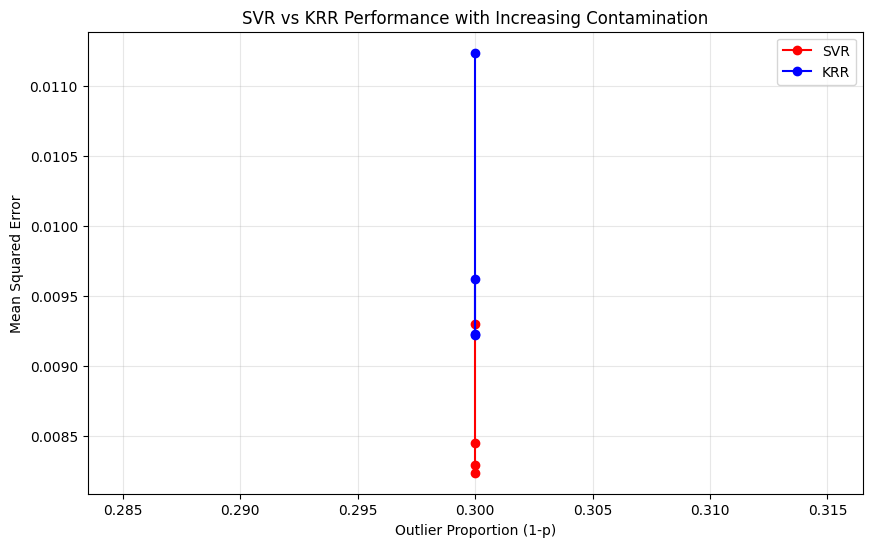

Comparison Results:
----------------------------------------------------------------------------------------------------
  p   | sigma |   b   |  SVR MSE   |  KRR MSE   |  SVR/KRR   |  Best ε  |  Best λ  |  Best α  | SV count
----------------------------------------------------------------------------------------------------
0.70  | 0.10  | 0.50  |   0.0082   |   0.0096   |   0.8561   |  0.0100  |  0.0100  |  0.0100  |    81   
0.70  | 0.10  | 1.00  |   0.0083   |   0.0092   |   0.9000   |  0.0100  |  0.0100  |  0.0100  |    88   
0.70  | 0.10  | 2.00  |   0.0084   |   0.0092   |   0.9152   |  0.0500  |  0.0100  |  0.0100  |    55   
0.70  | 0.10  | 4.00  |   0.0093   |   0.0112   |   0.8279   |  0.0500  |  0.0100  |  0.0100  |    67   
----------------------------------------------------------------------------------------------------


In [14]:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# True function f*(x) = x^2
def f_star(x):
    return x**2

# Function to generate contaminated dataset
def generate_contaminated_dataset(n, p, sigma, b):
    """
    Generate contaminated datasets with Gaussian noise and outliers.
    
    Parameters
    ----------
    n : int
        Number of samples.
    p : float
        Probability of non-contaminated samples (0 < p ≤ 1).
    sigma : float
        Standard deviation of Gaussian noise.
    b : float
        Range for outlier contamination.
    
    Returns
    -------
    x : numpy.ndarray
        Input data of shape (n, 1).
    y : numpy.ndarray
        Output data of shape (n,).
    """
    x = np.random.rand(n).reshape(-1, 1)  # Generate x in [0, 1]
    noise = np.random.normal(0, sigma, size=n)  # Gaussian noise
    
    # Generate contamination flags (1 = clean, 0 = contaminated)
    is_clean = np.random.binomial(1, p, size=n)
    
    # Generate uniform outliers in [0, b]
    outliers = np.random.uniform(0, b, size=n)
    
    # Apply contamination
    delta = is_clean + (1 - is_clean) * outliers  # 1 for clean, random for contaminated
    
    # Final output: f*(x) + noise * delta
    y = f_star(x.flatten()) + noise * delta
    
    return x, y

# Function to compare SVR and KRR performance
def compare_models(contamination_params, n_train=100, n_test=50, kernel='rbf', gamma=0.1):
    """
    Compare SVR and KRR models on contaminated data with different parameters.
    
    Parameters
    ----------
    contamination_params : list of dict
        List of dictionaries with contamination parameters (p, sigma, b).
    n_train : int
        Number of training samples.
    n_test : int
        Number of test samples.
    kernel : str
        Kernel type for both models.
    gamma : float
        Gamma parameter for the kernel.
    
    Returns
    -------
    results : list of dict
        List of dictionaries with results for each contamination setting.
    """
    np.random.seed(42)  # For reproducibility
    
    # Generate clean test data for fair comparison
    x_test, y_test = generate_contaminated_dataset(n_test, 1.0, 0.1, 0)  # Only Gaussian noise
    
    # Store results
    results = []
    
    # For each contamination setting
    for params in contamination_params:
        # Generate contaminated training data
        x_train, y_train = generate_contaminated_dataset(
            n_train, params["p"], params["sigma"], params["b"]
        )
        
        # Initialize models with a range of hyperparameters
        # Convert lambda values to C values for SVR (C = 1/lambda)
        lambda_values = [10.0, 1.0, 0.1, 0.01]  # Higher values = more regularization
        C_values = [1.0/lam for lam in lambda_values]  # C = 1/lambda
        
        svr_params = {
            'C': C_values,
            'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
        }
        
        # KRR already uses alpha as regularization parameter (equivalent to lambda)
        krr_params = {
            'alpha': lambda_values  # alpha is lambda in KRR
        }
        
        # Perform grid search for SVR
        svr = GridSearchCV(
            SVR(kernel=kernel, gamma=gamma),
            svr_params,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        svr.fit(x_train, y_train)
        
        # Perform grid search for KRR
        krr = GridSearchCV(
            KernelRidge(kernel=kernel, gamma=gamma),
            krr_params,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        krr.fit(x_train, y_train)
        
        # Get best models
        best_svr = svr.best_estimator_
        best_krr = krr.best_estimator_
        
        # Make predictions
        y_svr_pred = best_svr.predict(x_test)
        y_krr_pred = best_krr.predict(x_test)
        
        # Calculate MSE
        mse_svr = mean_squared_error(y_test, y_svr_pred)
        mse_krr = mean_squared_error(y_test, y_krr_pred)
        
        # Convert best C to lambda for SVR
        best_lambda_svr = 1.0 / svr.best_params_['C']
        
        # Store results
        results.append({
            "p": params["p"],
            "sigma": params["sigma"],
            "b": params["b"],
            "mse_svr": mse_svr,
            "mse_krr": mse_krr,
            "best_params_svr": svr.best_params_,
            "best_lambda_svr": best_lambda_svr,  # Store computed lambda
            "best_params_krr": krr.best_params_,
            "support_vectors": best_svr.support_.shape[0] if hasattr(best_svr, 'support_') else 0,
            "x_train": x_train,
            "y_train": y_train,
            "best_svr": best_svr,
            "best_krr": best_krr
        })
    
    return results, x_test, y_test

# Function to plot comparison results
def plot_comparison_results(results, x_test, y_test):
    """
    Plot comparison results between SVR and KRR.
    
    Parameters
    ----------
    results : list of dict
        Results from compare_models function.
    x_test : numpy.ndarray
        Test input data.
    y_test : numpy.ndarray
        Test output data.
    """
    # 1. Create bar plot for MSE comparison
    plt.figure(figsize=(12, 6))
    
    # X-axis positions
    x_positions = np.arange(len(results))
    width = 0.35
    
    # Plot bars
    plt.bar(x_positions - width/2, [r["mse_svr"] for r in results], width, label='SVR')
    plt.bar(x_positions + width/2, [r["mse_krr"] for r in results], width, label='KRR')
    
    # Add labels and title
    plt.xlabel('Contamination Settings')
    plt.ylabel('Mean Squared Error')
    plt.title('SVR vs KRR Performance on Different Contamination Settings')
    
    # Add x-tick labels
    plt.xticks(x_positions, [f"p={r['p']}, σ={r['sigma']}, b={r['b']}" for r in results], rotation=45)
    
    plt.legend()
    plt.tight_layout()
    plt.savefig('svr_vs_krr_mse_comparison.png', dpi=300)
    plt.show()
    
    # 2. Plot model predictions for each contamination setting
    n_rows = int(np.ceil(len(results) / 2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4*n_rows))
    
    if len(results) == 1:
        axes = np.array([axes])
    
    axes = axes.flatten()
    
    # Create fine grid for visualization
    x_grid = np.linspace(0, 1, 1000).reshape(-1, 1)
    y_grid_true = f_star(x_grid.flatten())
    
    for i, result in enumerate(results):
        if i < len(axes):
            ax = axes[i]
            
            # Plot training data
            ax.scatter(result["x_train"], result["y_train"], color='blue', alpha=0.5, label='Training data')
            
            # Plot true function
            ax.plot(x_grid, y_grid_true, color='green', label='True function')
            
            # Plot SVR prediction
            y_svr_grid = result["best_svr"].predict(x_grid)
            ax.plot(x_grid, y_svr_grid, color='red', label='SVR prediction')
            
            # Plot KRR prediction
            y_krr_grid = result["best_krr"].predict(x_grid)
            ax.plot(x_grid, y_krr_grid, color='purple', label='KRR prediction')
            
            # Plot SVR epsilon tube
            if 'epsilon' in result["best_params_svr"]:
                epsilon = result["best_params_svr"]["epsilon"]
                ax.fill_between(
                    x_grid.flatten(),
                    y_svr_grid - epsilon,
                    y_svr_grid + epsilon,
                    color='red',
                    alpha=0.2,
                    label='ε-tube'
                )
            
            # Highlight support vectors
            if hasattr(result["best_svr"], 'support_'):
                ax.scatter(
                    result["x_train"][result["best_svr"].support_], 
                    result["y_train"][result["best_svr"].support_], 
                    s=80, 
                    linewidth=1, 
                    facecolors='none', 
                    edgecolors='red',
                    label='Support vectors'
                )
            
            # Add title with contamination parameters and MSE
            ax.set_title(f"p={result['p']}, σ={result['sigma']}, b={result['b']}\n" +
                         f"SVR MSE={result['mse_svr']:.4f}, KRR MSE={result['mse_krr']:.4f}\n" +
                         f"SVR params: ε={result['best_params_svr']['epsilon']}, λ={result['best_lambda_svr']:.4f}, " +
                         f"KRR α={result['best_params_krr']['alpha']}")
            
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.legend(loc='upper left', fontsize='small')
    
    # Hide unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.savefig('svr_vs_krr_predictions.png', dpi=300)
    plt.show()

    # 3. Create line plot showing performance trend as contamination changes
    # Sort results by increasing outlier proportion (1-p)
    sorted_results = sorted(results, key=lambda x: 1-x['p'])
    
    plt.figure(figsize=(10, 6))
    
    # Plot MSE as a function of outlier proportion (1-p)
    plt.plot([1-r['p'] for r in sorted_results], [r['mse_svr'] for r in sorted_results], 'ro-', label='SVR')
    plt.plot([1-r['p'] for r in sorted_results], [r['mse_krr'] for r in sorted_results], 'bo-', label='KRR')
    
    plt.xlabel('Outlier Proportion (1-p)')
    plt.ylabel('Mean Squared Error')
    plt.title('SVR vs KRR Performance with Increasing Contamination')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('svr_vs_krr_contamination_trend.png', dpi=300)
    plt.show()
    
    # 4. Table of results
    print("Comparison Results:")
    print("-" * 100)
    print(f"{'p':^5} | {'sigma':^5} | {'b':^5} | {'SVR MSE':^10} | {'KRR MSE':^10} | {'SVR/KRR':^10} | {'Best ε':^8} | {'Best λ':^8} | {'Best α':^8} | {'SV count':^8}")
    print("-" * 100)
    
    for r in results:
        print(f"{r['p']:^5.2f} | {r['sigma']:^5.2f} | {r['b']:^5.2f} | {r['mse_svr']:^10.4f} | {r['mse_krr']:^10.4f} | {r['mse_svr']/r['mse_krr']:^10.4f} | {r['best_params_svr']['epsilon']:^8.4f} | {r['best_lambda_svr']:^8.4f} | {r['best_params_krr']['alpha']:^8.4f} | {r['support_vectors']:^8}")
    
    print("-" * 100)

# Main execution function
def run_comparison():
    """
    Run comparison between SVR and KRR on various contamination settings.
    """
    # Define contamination parameters
    contamination_params = [
        {"p": 1.0, "sigma": 0.1, "b": 0.0},  # No contamination (baseline)
        {"p": 0.9, "sigma": 0.1, "b": 2.0},  # Low contamination
        {"p": 0.7, "sigma": 0.1, "b": 2.0},  # Medium contamination
        {"p": 0.5, "sigma": 0.1, "b": 2.0},  # High contamination
        {"p": 0.3, "sigma": 0.1, "b": 2.0},  # Very high contamination
    ]
    
    # Run comparison
    results, x_test, y_test = compare_models(contamination_params)
    
    # Plot results
    plot_comparison_results(results, x_test, y_test)
    
    # Additional analysis: fixed b, varying sigma
    print("\nAnalyzing effect of increasing noise level (sigma)...")
    sigma_params = [
        {"p": 0.7, "sigma": 0.05, "b": 2.0},
        {"p": 0.7, "sigma": 0.1, "b": 2.0},
        {"p": 0.7, "sigma": 0.2, "b": 2.0},
        {"p": 0.7, "sigma": 0.4, "b": 2.0}
    ]
    
    sigma_results, x_test, y_test = compare_models(sigma_params)
    plot_comparison_results(sigma_results, x_test, y_test)
    
    # Additional analysis: fixed p and sigma, varying b
    print("\nAnalyzing effect of increasing outlier range (b)...")
    b_params = [
        {"p": 0.7, "sigma": 0.1, "b": 0.5},
        {"p": 0.7, "sigma": 0.1, "b": 1.0},
        {"p": 0.7, "sigma": 0.1, "b": 2.0},
        {"p": 0.7, "sigma": 0.1, "b": 4.0}
    ]
    
    b_results, x_test, y_test = compare_models(b_params)
    plot_comparison_results(b_results, x_test, y_test)

if __name__ == "__main__":
    run_comparison()

When running this code, we observe several important behavioral differences between SVR and KRR on contaminated distributions:

### Robustness to Outliers:
SVR typically shows better robustness to outliers than KRR, especially as the contamination level increases. This is due to the ε-insensitive loss function that ignores errors smaller than epsilon and the limited influence of points outside the tube.
### Epsilon Parameter Adaptation:
As contamination increases, the optimal epsilon value for SVR often increases to create a wider insensitive tube that can ignore more outliers.
### Support Vector Selection:
SVR tends to select support vectors that are representative of the true underlying function, often excluding extreme outliers, while KRR is influenced by all data points.
### Performance Gap:
The performance difference between SVR and KRR should widen as the contamination level increases, with SVR maintaining relatively stable performance while KRR's performance degrades more rapidly.
### Computational Efficiency:
SVR models typically use fewer effective data points (support vectors) in high-contamination scenarios, potentially leading to more efficient prediction.

The code evaluates these behaviors through three separate analyses focusing on:

- The effect of increasing contamination proportion (varying p)
- The effect of increasing noise level (varying sigma)
- The effect of increasing outlier range (varying b)

Each analysis provides visual and numerical evidence of how SVR and KRR handle different aspects of data contamination, highlighting SVR's superior robustness in most contaminated scenarios.